In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [4]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)
pd.options.display.float_format = '{:,}'.format

pd.set_option('display.max_columns', None)

pd.set_option('display.max_rows', None)


In [5]:
sdtypes ={'Store_Number':str,'Zip_Code':str}

In [6]:
stores_clust_info_combined3 = pd.read_csv(r'C:\Users\dgarb\OneDrive\Desktop\Capstone Data\liquor_2021\stores_clust_info_combined3.csv',index_col=0, dtype=sdtypes,)

In [7]:
stores_clust_info_combined3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1948 entries, 0 to 1947
Data columns (total 57 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Store_Number                      1948 non-null   object 
 1   Store_Name                        1948 non-null   object 
 2   Address                           1948 non-null   object 
 3   City                              1948 non-null   object 
 4   Zip_Code                          1948 non-null   object 
 5   Store_Location                    1790 non-null   object 
 6   County_Number                     1948 non-null   int64  
 7   County                            1948 non-null   object 
 8   Store_Name.1                      1948 non-null   object 
 9   store_revenue                     1948 non-null   float64
 10  tot_num_unique_items              1948 non-null   int64  
 11  num_unique_clusters               1948 non-null   int64  
 12  tot_it

### drop 18 outlier stores

In [8]:
stores_clust_info_combined4 = stores_clust_info_combined3.loc[stores_clust_info_combined3.n_clusters_4 != 2]
stores_clust_info_combined4.shape

(1930, 57)

In [9]:
stores_clust_info_combined3.shape

(1948, 57)

In [10]:
# stores_clust_info_combined4.columns

### drop scaled features

In [11]:
# stores_clust_info_combined4 = 
# stores_clust_info_combined4 = 
stores_clust_info_combined4 = stores_clust_info_combined4.drop(columns = ['tot_num_unique_items_scaled',
       'rev_Cheap_scaled', 'rev_Moderately_High_scaled',
       'rev_Most_Variety_scaled', 'rev_Popular_Bottles_scaled',
       'rev_Volume_For_Dollar_scaled', 'cl_Cheap_scaled', 'cl_High_End_scaled',
       'cl_Moderately_High_scaled', 'cl_Most_Variety_scaled',
       'cl_Popular_Bottles_scaled', 'cl_Quick_Shots_scaled',
       'cl_Volume_For_Dollar_scaled', 'num_unique_clusters_scaled',
       'n_clusters_2', 'n_clusters_4'])

In [12]:
stores_clust_info_combined4.shape

(1930, 41)

### make a copy of stores_clust_info_combined4

In [13]:
stores_clust_info_combined4_copy = stores_clust_info_combined4.copy()

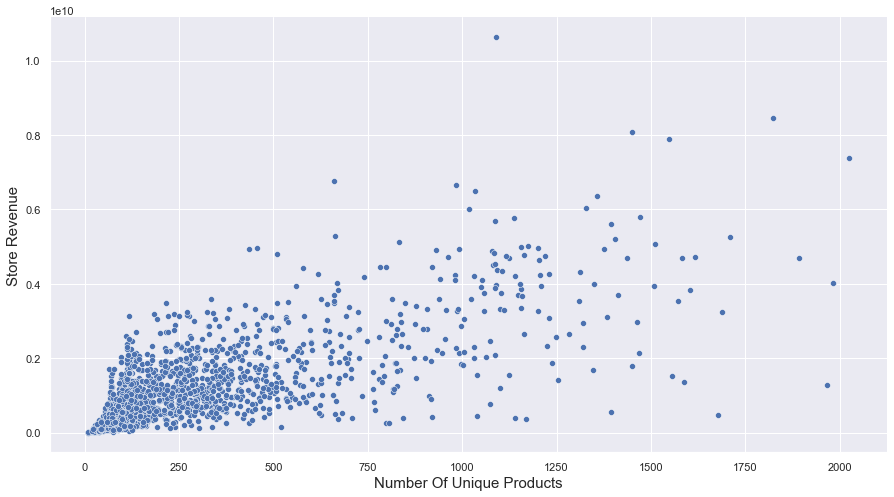

In [14]:

sns.set(rc = {'figure.figsize':(15,8)})
scatter = sns.scatterplot(x = 'tot_num_unique_items',y = 'store_revenue',data = stores_clust_info_combined4) #hue='label'
scatter.set_xlabel('Number Of Unique Products',fontsize=15)
scatter.set_ylabel('Store Revenue',fontsize=15)
sns.despine()

In [15]:
stores_clust_info_combined4[stores_clust_info_combined4.tot_num_unique_items > 1750]

,Store_Number,Store_Name,Address,City,Zip_Code,Store_Location,County_Number,County,Store_Name.1,store_revenue,tot_num_unique_items,num_unique_clusters,tot_item_count,rev_Cheap,rev_High_End,rev_Moderately_High,rev_Most_Variety,rev_Popular_Bottles,rev_Quick_Shots,rev_Volume_For_Dollar,prod_count_pct_Cheap,prod_count_pct_High_End,prod_count_pct_Moderately_High,prod_count_pct_Most_Variety,prod_count_pct_Popular_Bottles,prod_count_pct_Quick_Shots,prod_count_pct_Volume_For_Dollar,item_Cheap,item_High_End,item_Moderately_High,item_Most_Variety,item_Popular_Bottles,item_Quick_Shots,item_Volume_For_Dollar,cl_Cheap,cl_High_End,cl_Moderately_High,cl_Most_Variety,cl_Popular_Bottles,cl_Quick_Shots,cl_Volume_For_Dollar
1166,6132,Dubuque Wine & Spirits,3305 Asbury Rd,Dubuque,52002,POINT (-90.72104 42.51242500000001),31,DUBUQUE,Dubuque Wine & Spirits,"1,285,899,061.49",1966,7,3133,22.268733031673253,0.324638081247442,3.4135072234315764,9.142660019813247,49.8945997158261,2.508752787533695,12.447109140474687,10.53303542930099,1.3086498563676987,11.20331950207469,43.18544526013406,6.160229811682094,12.065113309926588,15.544206830513884,6.510681586978636,1.2716174974567651,11.291963377416073,52.54323499491353,2.0854526958290944,11.90233977619532,14.39471007121058,94.11764705882352,15.92356687898089,25.313568985176737,46.97589813551614,97.61904761904762,53.669724770642205,62.33480176211453
1320,2614,Hy-Vee #3 Food & Drugstore / Davenport,1823 E Kimberly Rd,Davenport,52807,POINT (-90.548919 41.55678100000001),82,SCOTT,Hy-Vee #3 Food & Drugstore / Davenport,"4,694,029,900.97",1893,7,11239,21.09936289935725,0.1696255613615633,1.976539401268568,10.92030253096754,43.54052191247561,2.4026483805885923,19.89099931398088,12.687961562416586,0.6940119227689296,6.379571136222085,40.5285167719548,6.47744461251001,12.66126879615624,20.571225197971348,5.916534601162176,2.0073956682514527,12.044374009508717,53.61859482303223,2.060221870047544,9.8256735340729,14.527205493924985,82.35294117647058,24.203821656050955,25.997719498289623,46.157344247385176,92.85714285714286,42.6605504587156,60.57268722466961
1401,4129,Cyclone Liquors,626 Lincoln Way,Ames,50010,POINT (-93.618289 42.022865),85,STORY,Cyclone Liquors,"4,028,389,918.1",1983,7,9923,22.306852041865653,0.297399497902889,3.6357689153159134,13.702351636068652,49.16512047706984,1.0891686495604729,9.80333878221658,11.367529980852565,1.279854882595989,12.738083240955357,51.49652322886224,5.280661090396049,6.066713695455003,11.770633880882798,6.101865859808371,2.4710035300050426,17.95259707513868,54.36207766011094,1.9667170953101365,7.261724659606656,9.88401412002017,88.97058823529412,31.210191082802545,40.59293044469784,49.02228285584357,92.85714285714286,33.02752293577982,43.17180616740088
1405,3773,Benz Distributing,501 7th Ave SE,Cedar Rapids,52401,POINT (-91.659875 41.97574),57,LINN,Benz Distributing,"8,451,653,814.22",1823,7,13453,26.98651910532016,0.1955763995230026,2.9792234851876493,10.62478420045028,49.54070606696303,0.2039617341045919,9.469229008451288,17.527688991303055,1.4197576748680591,11.016130231175204,52.8506652791199,7.909016576228351,2.244852449267821,7.031888798037612,4.71749862863412,3.2912781130005486,20.899616017553484,55.62260010970928,1.6456390565002743,8.228195282501371,5.595172792100932,63.23529411764706,38.21656050955414,43.44355758266818,46.1118690313779,71.42857142857143,34.403669724770644,22.46696035242291
1856,2190,"Central City Liquor, Inc.",1460 2ND AVE,Des Moines,50314,POINT (-93.619788 41.605706),77,POLK,"Central City Liquor, Inc.","7,370,230,566.75",2025,7,15428,18.839015207529226,0.5137403498720741,3.97409309189574,10.552697507846933,52.08916007254435,1.6330552383665022,12.39823853194518,11.647653616800625,2.2815659839253306,14.551464869069225,44.62665283899403,6.501166709878143,9.197562872698988,11.193933108633653,5.728395061728396,3.950617283950617,22.17283950617284,50.17283950617284,1.925925925925926,7.358024691358024,8.691358024691358,85.29411764705883,50.955414012738856,51

### create outlier data frame

In [16]:
outliers_df = stores_clust_info_combined4[stores_clust_info_combined4.tot_num_unique_items > 1750]

### remove 5 outliers

In [17]:
filt = stores_clust_info_combined4.tot_num_unique_items > 1750

In [18]:
stores_clust_info_combined4 = stores_clust_info_combined4[~filt]

In [20]:
features = ['store_revenue','tot_num_unique_items',
 'rev_Cheap',
 'rev_Moderately_High',
 'rev_Most_Variety',
 'rev_Popular_Bottles',
 'rev_Volume_For_Dollar', 
 'cl_Cheap',
 'cl_High_End',
 'cl_Moderately_High',
 'cl_Most_Variety',
 'cl_Popular_Bottles',
 'cl_Quick_Shots',
 'cl_Volume_For_Dollar',
  'num_unique_clusters'         ]

In [21]:
scaled_features = ['store_revenue_scaled','tot_num_unique_items_scaled',
 'rev_Cheap_scaled',
 'rev_Moderately_High_scaled',
 'rev_Most_Variety_scaled',
 'rev_Popular_Bottles_scaled',
 'rev_Volume_For_Dollar_scaled', 
 'cl_Cheap_scaled',
 'cl_High_End_scaled',
 'cl_Moderately_High_scaled',
 'cl_Most_Variety_scaled',
 'cl_Popular_Bottles_scaled',
 'cl_Quick_Shots_scaled',
 'cl_Volume_For_Dollar_scaled', 'num_unique_clusters_scaled']

In [22]:
stores_clust_info_combined4 = stores_clust_info_combined4.reset_index()


In [23]:
stores_clust_info_combined4.head()

,index,Store_Number,Store_Name,Address,City,Zip_Code,Store_Location,County_Number,County,Store_Name.1,store_revenue,tot_num_unique_items,num_unique_clusters,tot_item_count,rev_Cheap,rev_High_End,rev_Moderately_High,rev_Most_Variety,rev_Popular_Bottles,rev_Quick_Shots,rev_Volume_For_Dollar,prod_count_pct_Cheap,prod_count_pct_High_End,prod_count_pct_Moderately_High,prod_count_pct_Most_Variety,prod_count_pct_Popular_Bottles,prod_count_pct_Quick_Shots,prod_count_pct_Volume_For_Dollar,item_Cheap,item_High_End,item_Moderately_High,item_Most_Variety,item_Popular_Bottles,item_Quick_Shots,item_Volume_For_Dollar,cl_Cheap,cl_High_End,cl_Moderately_High,cl_Most_Variety,cl_Popular_Bottles,cl_Quick_Shots,cl_Volume_For_Dollar
0,0,3855,Dyno's Wine and Spirits / Storm Lake,1201 1/2 Lakeshore Dr,Storm Lake,50588,NaN,11,BUENA VIST,Dyno's Wine and Spirits / Storm Lake,"22,050,030.17",30,4,30,19.88587460513212,0.0,0.0,7.122834471840543,69.2775465712662,3.713744351761129,0.0,23.33333333333333,0.0,0.0,36.66666666666666,16.666666666666664,23.33333333333333,0.0,23.33333333333333,0.0,0.0,36.66666666666666,16.666666666666664,23.33333333333333,0.0,5.147058823529411,0.0,0.0,0.5002273760800363,11.904761904761903,1.6055045871559634,0.0
1,1,4589,Dyno's #53 / Sibley,1026 2nd Ave,Sibley,51249,POINT (-95.752119 43.397431),72,OSCEOLA,Dyno's #53 / Sibley,"48,408,685.66",36,5,36,22.80767234117052,0.0,0.0,3.5187176986453217,61.94238263481082,1.1333202761448409,10.597907049228484,25.0,0.0,0.0,33.33333333333333,16.666666666666664,8.333333333333332,16.666666666666664,25.0,0.0,0.0,33.33333333333333,16.666666666666664,8.333333333333332,16.666666666666664,6.61764705882353,0.0,0.0,0.5457025920873124,14.285714285714285,0.6880733944954129,1.3215859030837005
2,2,5688,Dyno's #40 / Spencer,1001 S Grand Ave,Spencer,51301,POINT (-95.143701 43.12759),21,CLAY,Dyno's #40 / Spencer,"24,308,995.32",14,4,14,6.779766330548622,0.0,0.0,0.1961223792773349,86.98117977176855,0.0,6.042931518405508,21.428571428571427,0.0,0.0,7.142857142857142,50.0,0.0,21.428571428571427,21.428571428571427,0.0,0.0,7.142857142857142,50.0,0.0,21.428571428571427,2.2058823529411766,0.0,0.0,0.045475216007276,16.666666666666664,0.0,0.6607929515418502
3,3,4592,Dyno's #29 / Emmetsburg,"2401, Main",Emmetsburg,50536,POINT (-94.681939 43.111913),74,PALO ALTO,Dyno's #29 / Emmetsburg,"11,723,322.21",33,5,33,24.31773484454967,0.0,0.0,8.17652311204368,27.538225019919505,2.951211131132085,37.01630589235507,15.151515151515152,0.0,0.0,30.303030303030305,9.090909090909092,27.27272727272727,18.181818181818183,15.151515151515152,0.0,0.0,30.303030303030305,9.090909090909092,27.27272727272727,18.181818181818183,3.6764705882352944,0.0,0.0,0.4547521600727603,7.142857142857142,2.064220183486239,1.3215859030837005
4,4,5689,Dyno's #41 / Albert City,5101 230th St,Albert City,50510,POINT (-94.953239 42.777449),11,BUENA VIST,Dyno's #41 / Albert City,"6,766,721.37",13,4,13,49.1369431101609,0.0,0.0,6.083004124048927,44.51670514106007,0.2633476247301136,0.0,38.46153846153847,0.0,0.0,30.76923076923077,23.07692307692308,7.6923076923076925,0.0,38.46153846153847,0.0,0.0,30.76923076923077,23.07692307692308,7.6923076923076925,0.0,3.6764705882352944,0.0,0.0,0.1819008640291041,7.142857142857142,0.2293577981651376,0.0


In [24]:
stores_clust_info_combined4 = stores_clust_info_combined4.drop(columns=['index'])

In [25]:
scaler = StandardScaler()

In [26]:
type(stores_clust_info_combined4)

pandas.core.frame.DataFrame

### scale features

In [27]:
stores_clust_info_combined4[scaled_features] = scaler.fit_transform\
                                           (stores_clust_info_combined4[features])


In [28]:
stores_clust_info_combined4[scaled_features].describe()

,store_revenue_scaled,tot_num_unique_items_scaled,rev_Cheap_scaled,rev_Moderately_High_scaled,rev_Most_Variety_scaled,rev_Popular_Bottles_scaled,rev_Volume_For_Dollar_scaled,cl_Cheap_scaled,cl_High_End_scaled,cl_Moderately_High_scaled,cl_Most_Variety_scaled,cl_Popular_Bottles_scaled,cl_Quick_Shots_scaled,cl_Volume_For_Dollar_scaled,num_unique_clusters_scaled
count,"1,925.0","1,925.0","1,925.0","1,925.0","1,925.0","1,925.0","1,925.0","1,925.0","1,925.0","1,925.0","1,925.0","1,925.0","1,925.0","1,925.0","1,925.0"
mean,-3.041722717856143e-16,4.559123641382785e-16,-3.837334490568041e-16,1.0858269550450817e-15,9.458523430572763e-18,9.65432640037029e-16,-8.679925465251224e-17,-3.5356998714101415e-16,4.664522736317979e-15,-2.375271696502585e-15,9.902612640422825e-17,2.3611704222417613e-16,2.1685395182288772e-16,1.3138119740758995e-15,-3.031946987847106e-15
std,1.000259841501072,1.0002598415010715,1.0002598415010728,1.000259841501069,1.0002598415010722,1.0002598415010728,1.0002598415010724,1.000259841501072,1.0002598415010777,1.0002598415010737,1.0002598415010717,1.0002598415010753,1.0002598415010722,1.0002598415010728,1.0002598415010706
min,-1.0209021505356213,-0.8831767555039094,-2.7088945141536414,-0.5567704605715388,-1.0427622845943378,-5.183857836759887,-1.1544175283619036,-1.9706706210413456,-0.43810044669216064,-0.4962548677508225,-0.6762060609228074,-3.378037108882044,-0.8518686283523119,-0.793981224163699,-5.145250637159427
25%,-0.659257856905999,-0.6029906536377758,-0.6883176298167614,-0.5567704605715388,-0.7215953721739656,-0.7089685223293651,-0.8022215247198574,-0.6348712490654459,-0.43810044669216064,-0.4962548677508225,-0.5769715214454803,-0.6131570397473302,-0.6691034944174415,-0.6603318837898688,-0.956813180120883
50%,-0.31980500151827806,-0.45108252611999256,-0.1112154817197646,-0.5022023361948587,-0.3918255872269455,0.11174432107726566,-0.3605454871689411,-0.2039682258474138,-0.43810044669216064,-0.44761976845236345,-0.47153482325082013,0.07806297753634882,-0.4080104459390553,-0.5044076533537338,0.09029618413875301
75%,0.3027485749638378,0.20718602645706824,0.5278120502856232,0.161044880105285,0.39759948562240593,0.8228840264957427,0.6788762001342366,0.4854766113014383,-0.11943679285410685,-0.058538974064690705,0.1300745723304757,0.6310389913632918,0.24472217525691034,0.38658794913846656,1.137405548398389
max,8.727601130398927,4.855574728501236,8.849417256122818,10.719247667911723,6.130693199905121,2.0297245921499103,4.158416868003454,3.286346262218647,10.396463783801668,8.695778899657943,5.116610181066164,2.4282110363008558,5.571020364215989,5.019765082097908,1.137405548398389


### store_revenue is correlated with tot_num_unique_items

In [29]:
stores_clust_info_combined4.store_revenue.corr(stores_clust_info_combined4.tot_num_unique_items)

0.7279811881545474

In [30]:
stores_clust_info_combined4.shape

(1925, 56)

In [31]:
# stores_clust_info_combined4.info()

In [189]:
# from sklearn.metrics import silhouette_score

# cluster_cols = [       
#  'rev_Cheap_scaled',
#  'rev_Moderately_High_scaled',
#  'rev_Most_Variety_scaled',
#  'rev_Popular_Bottles_scaled',
#  'rev_Volume_For_Dollar_scaled']
# #  'cl_Cheap_scaled',
# #  'cl_High_End_scaled',
# #  'cl_Moderately_High_scaled',
# #  'cl_Most_Variety_scaled',
# #  'cl_Popular_Bottles_scaled',
 
# #  'cl_Volume_For_Dollar_scaled']

# df_scaled = stores_clust_info_combined4[cluster_cols]


# for clust in range(2,11):
#     model = KMeans(n_clusters=clust, random_state=42).fit(df_scaled)
    

    
#     silhouette_avg = silhouette_score(df_scaled,model.labels_)
#     print('number of clusters = ',clust,' ','silhouette score = ',silhouette_avg)

In [33]:
from sklearn.metrics import silhouette_score

cluster_cols = ['tot_num_unique_items_scaled',       
 'rev_Cheap_scaled',
 'rev_Moderately_High_scaled',
 'rev_Most_Variety_scaled',
 'rev_Popular_Bottles_scaled',
 'rev_Volume_For_Dollar_scaled']
#  'cl_Cheap_scaled',
#  'cl_High_End_scaled',
#  'cl_Moderately_High_scaled',
#  'cl_Most_Variety_scaled',
#  'cl_Popular_Bottles_scaled',
 
#  'cl_Volume_For_Dollar_scaled']

df_scaled = stores_clust_info_combined4[cluster_cols]


for clust in range(2,6):
    model = KMeans(n_clusters=clust, random_state=42).fit(df_scaled)
    

    
    silhouette_avg = silhouette_score(df_scaled,model.labels_)
    print('number of clusters = ',clust,' ','silhouette score = ',silhouette_avg)

number of clusters =  2   silhouette score =  0.4475062643557119
number of clusters =  3   silhouette score =  0.3835062078437221
number of clusters =  4   silhouette score =  0.4223344841413703
number of clusters =  5   silhouette score =  0.34369039286063285


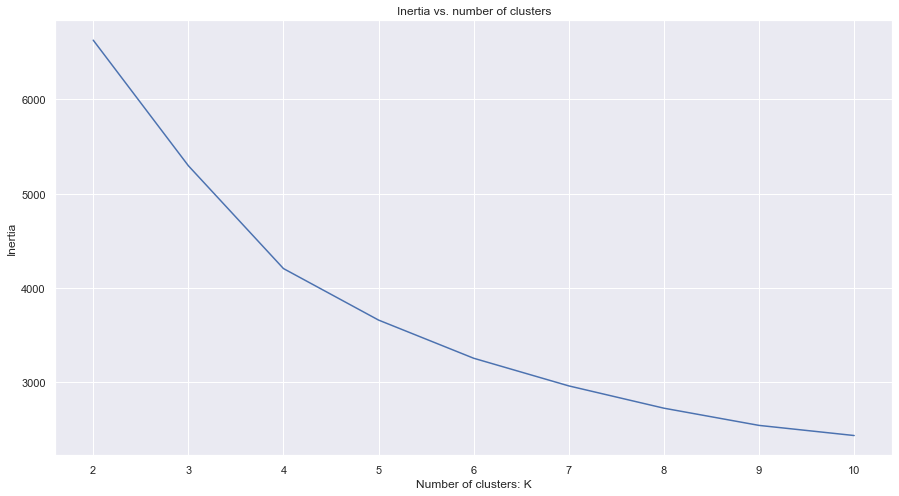

In [34]:
cluster_cols = ['tot_num_unique_items_scaled',
 'rev_Cheap_scaled',
 'rev_Moderately_High_scaled',
 'rev_Most_Variety_scaled',
 'rev_Popular_Bottles_scaled',
 'rev_Volume_For_Dollar_scaled']

df_scaled = stores_clust_info_combined4[cluster_cols]

inertia_scores = []

for clust in range(2,11):
    inertia = KMeans(n_clusters=clust, random_state=42)\
              .fit(df_scaled).inertia_
    inertia_scores.append(inertia)

plt.plot(range(2,11), inertia_scores)
plt.title("Inertia vs. number of clusters")
plt.xlabel("Number of clusters: K")
plt.ylabel('Inertia')
plt.show()


#### Functions to create a polar graph


In [35]:

# # THEN:

import pandas as pd
import plotly.graph_objects as go
import plotly.express as px 
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler, StandardScaler

def scale(df, cols, **kwargs):
    df = df.loc[:, cols]
    df = df.to_numpy()
    if 'scaletype' in kwargs and kwargs['scaletype'] == 'minmax':
        scaler = MinMaxScaler()
    else:
        scaler = StandardScaler()
    scaler.fit(df)
    X = scaler.transform(df)
    dff = pd.DataFrame(X, columns = cols)
    return dff, scaler

def get_kmeans(data, cols, n_clusters = 3, random_state = 42, **kwargs):
    data, scaler = scale(df = data, cols = cols, **kwargs)
    kmeans = KMeans(n_clusters=n_clusters, init='k-means++', n_init = 10, tol = 1e-04, random_state = random_state)
    kmeans.fit(data)
    clusters = pd.DataFrame(data, columns = cols)
    clusters['label'] = kmeans.labels_
    polars = clusters.groupby('label').mean().reset_index()
    polars = pd.melt(polars, id_vars = ['label'])
    fig = px.line_polar(polars, r='value', theta = 'variable', color = 'label', line_close = True, height = 800, width = 1400)
    return fig, polars, clusters, scaler

def get_clusters(data, cols, cluster_labels):
    data = data[cols]
    clusters = pd.DataFrame(data, columns = cols)
    clusters['label'] = cluster_labels
    polar = clusters.groupby('label').mean().reset_index()
    polar = pd.melt(polar, id_vars = ['label'])
    fig = px.line_polar(polar, r = 'value', theta = 'variable', color = 'label', line_close = True, height = 800, width = 1400)
    return fig, polar, clusters, scaler





    
    
 


In [36]:
cols1 = ['tot_num_unique_items',
 'rev_Cheap',
 'rev_Moderately_High',
 'rev_Most_Variety',
 'rev_Popular_Bottles',
 'rev_Volume_For_Dollar']

In [37]:
stores_clust_info_combined4[cols1].describe().round(2)

,tot_num_unique_items,rev_Cheap,rev_Moderately_High,rev_Most_Variety,rev_Popular_Bottles,rev_Volume_For_Dollar
count,"1,925.0","1,925.0","1,925.0","1,925.0","1,925.0","1,925.0"
mean,270.62,17.37,0.66,3.27,68.59,8.79
std,296.31,6.41,1.19,3.13,13.24,7.61
min,9.0,0.0,0.0,0.0,0.0,0.0
25%,92.0,12.96,0.0,1.01,59.21,2.68
50%,137.0,16.66,0.07,2.04,70.07,6.04
75%,332.0,20.76,0.86,4.51,79.48,13.95
max,"1,709.0",74.13,13.46,22.47,95.45,40.44


using functions to create radial graph

In [38]:

# df_scaled = scale(stores_clust_info_combined4, cols1)
# fig, polars, clusters, scaler = get_kmeans(stores_clust_info_combined4, cols = cols1,n_clusters=3)
# fig, polars, clusters, scaler = get_clusters(clusters, cols1, clusters['label'])
# # plt.figure(figsize = (12,10))
# fig.update_layout(
#     autosize=False,
#     width=400,
#     height=400,)
# fig.show()



In [39]:
# 1. Red = Supermarkets with lots of alcohol variety
# 1. Blue = Smaller bodegas with lower variety that focus much more than other store types on selling popular bottles 
# 1. Green = Medium-sized mom and pop stores that carry some but not a ton of variety and exist in the middle between two other groups 

### three clusters

In [40]:
# cols1 = ['tot_num_unique_items',
#  'rev_Cheap',
#  'rev_Moderately_High',
#  'rev_Most_Variety',
#  'rev_Popular_Bottles',
#  'rev_Volume_For_Dollar']


# df_scaled = scale(stores_clust_info_combined4, cols1)
# fig, polars, clusters, scaler = get_kmeans(stores_clust_info_combined4, cols = cols1,n_clusters=3)
# fig, polars, clusters, scaler = get_clusters(clusters, cols1, clusters['label'])
# # plt.figure(figsize = (12,10))
# fig.update_layout(
#     autosize=False,
#     width=800,
#     height=800,)
# fig.show()



### three clusters

In [41]:
# cluster_cols = ['tot_num_unique_items_scaled',
#  'rev_Cheap_scaled',
#  'rev_Moderately_High_scaled',
#  'rev_Most_Variety_scaled',
#  'rev_Popular_Bottles_scaled',
#  'rev_Volume_For_Dollar_scaled']
# # 'rev_Moderately_High_scaled',

# model = KMeans(n_clusters=3, random_state=42)

# model.fit(stores_clust_info_combined4[cluster_cols])

# stores_clust_info_combined4['label_1'] = model.predict(stores_clust_info_combined4[cluster_cols])

In [42]:
pd.set_option('display.max_columns', None)

pd.set_option('display.max_rows', None)



In [43]:
# stores_clust_info_combined4.groupby(['label_1']).agg({'Store_Number':'count','store_revenue_scaled':['mean','median','std'],
#                                                     'tot_num_unique_items_scaled':['mean','median','std'],
#  'rev_Cheap_scaled':['mean','median','std'],
#  'rev_Moderately_High_scaled':['mean','median','std'],
#  'rev_Most_Variety_scaled':['mean','median','std'],
#  'rev_Popular_Bottles_scaled':['mean','median','std'],
#  'rev_Volume_For_Dollar_scaled':['mean','median','std'],})

In [44]:
pd.set_option('display.max_columns', None)

pd.set_option('display.max_rows', None)

# where do I put my store to make the most money
# don't worry about inventory

In [96]:
# 3 Clusters
# stores_clust_info_combined4.groupby(['label_1']).agg({'Store_Number':'count','store_revenue':['mean','median','std'],
#                                                     'tot_num_unique_items':['mean','median','std'],
#  'rev_Cheap':['mean','median','std'],
#  'rev_Moderately_High':['mean','median','std'],
#  'rev_Most_Variety':['mean','median','std'],
#  'rev_Popular_Bottles':['mean','median','std'],
#  'rev_Volume_For_Dollar':['mean','median','std'],})

In [97]:
# # 3 Clusters
# stores_clust_info_combined4.groupby(['label_1']).agg({'Store_Number':'count','store_revenue':['median'],
#                                                     'tot_num_unique_items':['median'],
#  'rev_Cheap':['median'],
#  'rev_Moderately_High':['median'],
#  'rev_Most_Variety':['median'],
#  'rev_Popular_Bottles':['median'],
#  'rev_Volume_For_Dollar':['median']})

In [98]:
# cols = ['Store_Name',  'City', 'Zip_Code',
#         'County', 
#        'store_revenue', 'tot_num_unique_items', 'num_unique_clusters',
#        'tot_item_count', 'rev_Cheap', 'rev_High_End', 'rev_Moderately_High',
#        'rev_Most_Variety', 'rev_Popular_Bottles', 
#        'rev_Volume_For_Dollar', 'cl_Cheap', 'cl_High_End',
#        'cl_Moderately_High', 'cl_Most_Variety', 'cl_Popular_Bottles',
#        'cl_Quick_Shots', 'cl_Volume_For_Dollar']

# stores_clust_info_combined4.loc[stores_clust_info_combined4.label_1 == 0,cols].sample(n=100)

In [99]:
# stores_clust_info_combined4.loc[stores_clust_info_combined4.label_1 == 1,cols].sample(n=100)

In [100]:
# stores_clust_info_combined4.loc[stores_clust_info_combined4.label_1 == 2,cols].sample(n=100) #convenience stores

In [50]:
#      ['tot_num_unique_items',
#      'num_unique_clusters',
#      'tot_item_count',
product_clusters =     ['rev_Cheap', 
      'rev_High_End',
     
     'rev_Moderately_High',
     'rev_Most_Variety',
     'rev_Popular_Bottles',
     'rev_Quick_Shots',
     'rev_Volume_For_Dollar']#'rev_Quick_Shots',

In [51]:
stores_clust_info_combined4[product_clusters].describe().round(2)

,rev_Cheap,rev_High_End,rev_Moderately_High,rev_Most_Variety,rev_Popular_Bottles,rev_Quick_Shots,rev_Volume_For_Dollar
count,"1,925.0","1,925.0","1,925.0","1,925.0","1,925.0","1,925.0","1,925.0"
mean,17.37,0.04,0.66,3.27,68.59,1.28,8.79
std,6.41,0.12,1.19,3.13,13.24,2.79,7.61
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,12.96,0.0,0.0,1.01,59.21,0.21,2.68
50%,16.66,0.0,0.07,2.04,70.07,0.62,6.04
75%,20.76,0.01,0.86,4.51,79.48,1.66,13.95
max,74.13,2.77,13.46,22.47,95.45,100.0,40.44


In [52]:
stores_clust_info_combined4.columns

Index(['Store_Number', 'Store_Name', 'Address', 'City', 'Zip_Code',
       'Store_Location', 'County_Number', 'County', 'Store_Name.1',
       'store_revenue', 'tot_num_unique_items', 'num_unique_clusters',
       'tot_item_count', 'rev_Cheap', 'rev_High_End', 'rev_Moderately_High',
       'rev_Most_Variety', 'rev_Popular_Bottles', 'rev_Quick_Shots',
       'rev_Volume_For_Dollar', 'prod_count_pct_Cheap',
       'prod_count_pct_High_End', 'prod_count_pct_Moderately_High',
       'prod_count_pct_Most_Variety', 'prod_count_pct_Popular_Bottles',
       'prod_count_pct_Quick_Shots', 'prod_count_pct_Volume_For_Dollar',
       'item_Cheap', 'item_High_End', 'item_Moderately_High',
       'item_Most_Variety', 'item_Popular_Bottles', 'item_Quick_Shots',
       'item_Volume_For_Dollar', 'cl_Cheap', 'cl_High_End',
       'cl_Moderately_High', 'cl_Most_Variety', 'cl_Popular_Bottles',
       'cl_Quick_Shots', 'cl_Volume_For_Dollar', 'store_revenue_scaled',
       'tot_num_unique_items_scaled', 're

In [55]:
product_clusters =     ['rev_Cheap', 
      'rev_High_End',
     
     'rev_Moderately_High',
     'rev_Most_Variety',
     'rev_Popular_Bottles',
     'rev_Quick_Shots',
     'rev_Volume_For_Dollar','rev_Quick_Shots']

In [54]:
stores_clust_info_combined4[product_clusters].head(100)

,rev_Cheap,rev_High_End,rev_Moderately_High,rev_Most_Variety,rev_Popular_Bottles,rev_Quick_Shots,rev_Volume_For_Dollar
0,19.88587460513212,0.0,0.0,7.122834471840543,69.2775465712662,3.713744351761129,0.0
1,22.80767234117052,0.0,0.0,3.5187176986453217,61.94238263481082,1.1333202761448409,10.597907049228484
2,6.779766330548622,0.0,0.0,0.1961223792773349,86.98117977176855,0.0,6.042931518405508
3,24.31773484454967,0.0,0.0,8.17652311204368,27.538225019919505,2.951211131132085,37.01630589235507
4,49.1369431101609,0.0,0.0,6.083004124048927,44.51670514106007,0.2633476247301136,0.0
5,11.409680437277272,0.0,3.4614971175417524,9.476002195301128,54.385544375212106,0.0881901000468268,21.179085774620912
6,35.245435729814886,0.0,2.8050935266323207,0.1308245177034617,56.56666997164373,5.251976254205593,0.0
7,4.226546015191237,0.0,0.0,0.6279892718630625,78.74289478274736,1.0582762402411745,15.344293689957162
8,3.9244760513009664,0.0,0.0,4.374279610932462,88.13075599630376,1.345367139082286,2.225121202380504
9,20.194006756516654,0.0,1.7703635445463113,7.421045131273144,62.56844214879999,0.5728721587482569,7.473270260115644


### Box plot of 'Product Clusters'

In [56]:
# sns.set(rc = {'figure.figsize':(15,8)})
# box = sns.boxplot(data=stores_clust_info_combined4[product_clusters], palette='Blues')
# box.set_xlabel('Product Clusters',fontsize=15)
# box.set_ylabel('Percent of Revenue',fontsize=15)

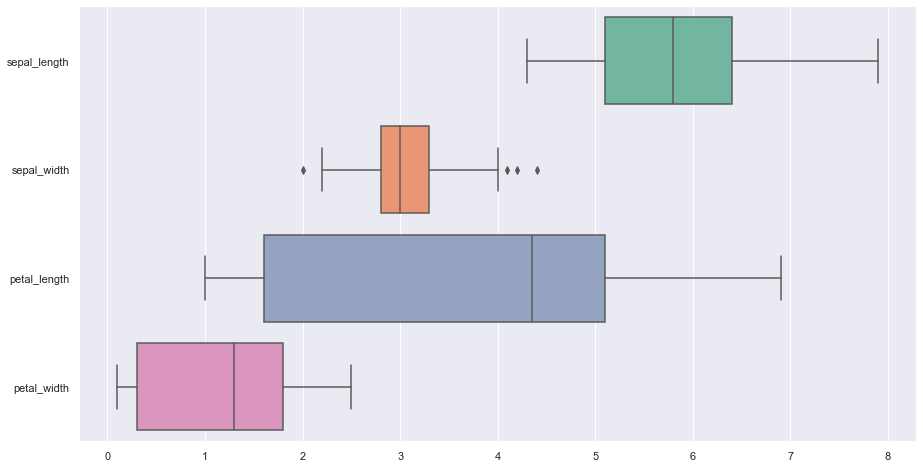

In [57]:
# from seaborn documentation
# Draw a boxplot for each numeric variable in a DataFrame:
iris = sns.load_dataset("iris")
ax = sns.boxplot(data=iris, orient="h", palette="Set2")



In [58]:
# from sklearn.metrics import silhouette_score

# cluster_cols = ['tot_num_unique_items_scaled',       
#  'rev_Cheap_scaled',
#  'rev_Moderately_High_scaled',
#  'rev_Most_Variety_scaled',
#  'rev_Popular_Bottles_scaled',
#  'rev_Volume_For_Dollar_scaled']
# # 'rev_Moderately_High_scaled',
# #  'cl_Cheap_scaled',
# #  'cl_High_End_scaled',
# #  'cl_Moderately_High_scaled',
# #  'cl_Most_Variety_scaled',
# #  'cl_Popular_Bottles_scaled',
 
# #  'cl_Volume_For_Dollar_scaled']

# df_scaled = stores_clust_info_combined4[cluster_cols]


# for clust in range(2,6):
#     model = KMeans(n_clusters=clust, random_state=42).fit(df_scaled)
    

    
#     silhouette_avg = silhouette_score(df_scaled,model.labels_)
#     print('number of clusters = ',clust,' ','silhouette score = ',silhouette_avg)

# # cluster_cols = ['tot_num_unique_items_scaled',
# #  'rev_Cheap_scaled',
# #  'rev_Moderately_High_scaled',
# #  'rev_Most_Variety_scaled',
# #  'rev_Popular_Bottles_scaled',
# #  'rev_Volume_For_Dollar_scaled']

# # df_scaled = stores_clust_info_combined2[cluster_cols]

# inertia_scores = []

# for clust in range(2,6):
#     inertia = KMeans(n_clusters=clust, random_state=42)\
#               .fit(df_scaled).inertia_
#     inertia_scores.append(inertia)

# plt.plot(range(2,6), inertia_scores)
# plt.title("Inertia vs. number of clusters")
# plt.xlabel("Number of clusters: K")
# plt.ylabel('Inertia')
# plt.show()


### four clusters

In [59]:
cluster_cols = ['tot_num_unique_items_scaled',
 'rev_Cheap_scaled',
 'rev_Moderately_High_scaled',
 'rev_Most_Variety_scaled',
 'rev_Popular_Bottles_scaled',
 'rev_Volume_For_Dollar_scaled']
# 'rev_Moderately_High_scaled',

model = KMeans(n_clusters=4, random_state=42)

model.fit(stores_clust_info_combined4[cluster_cols])

stores_clust_info_combined4['label_2'] = model.predict(stores_clust_info_combined4[cluster_cols])

In [95]:
stores_clust_info_combined4.groupby(['label_2']).agg({'Store_Number':'count','store_revenue':['mean','median','std'],
                                                    'tot_num_unique_items':['mean','median','std'],
 'rev_Cheap':['mean','median','std'],
 'rev_Moderately_High':['mean','median','std'],
 'rev_Most_Variety':['mean','median','std'],
 'rev_Popular_Bottles':['mean','median','std'],
 'rev_Volume_For_Dollar':['mean','median','std'],})

Store_Number         store_revenue                   \
               count                  mean           median   
label_2                                                       
0               1006   659,794,813.1571571  543,150,001.455   
1                199  2,752,718,178.906583 2,662,499,643.86   
2                483 1,493,270,501.9678674 1,321,865,033.16   
3                237   898,095,187.0127848   760,537,346.93   

                              tot_num_unique_items                            \
                          std                 mean median                std   
label_2                                                                        
0        492,231,674.87813383   105.66500994035785   98.0  51.02369080372109   
1       1,780,784,039.5750985    941.4321608040201  987.0 353.83589783517243   
2         939,004,870.2673031   333.48447204968943  295.0 176.20943448032597   
3         848,118,797.5642956   279.47679324894517  258.0 180.68076448277492   

                 rev_Cheap                                        \
                      mean             median                std   
label_2                                                            
0       14.560460447257357 14.432105704622263 4.2256691320619675   
1       21.685359739578796  21.51484522164545  3.665941290161281   
2       16.363159687115694 16.510242157523074   4.24452586984764   
3       27.748753499636734 26.821135682063733  7.196060219848471   

        rev_Moderately_High                                         \
                       mean             median                 std   
label_2                                                              
0       0.06767000961861727                0.0 0.21377717329027573   
1        2.1755915646275397  1.999076440671624   1.232158273137859   
2        0.5502055971801098 0.3793873025817029  0.6198591806637934   
3         2.161697650931138 1.9421763396084004  1.9085622464061143   

          rev_Most_Variety                                        \
                      mean             median                std   
label_2                                                            
0       1.2791771118145225 1.0739069696502113 0.8702819212695794   
1        9.946469442412837  9.511640323181798  2.918741745141717   
2        4.617963875068081   4.36477399652658 1.9149296704130467   
3        3.336354732793981 2.9950577603169046 1.9897060165005787   

        rev_Popular_Bottles                                      \
                       mean            median               std   
label_2                                                           
0         79.01583350963679 79.11668171469579 5.716528814205083   
1         48.09448187764342 47.65163462702034 7.174464807798803   
2          60.1745687765802 61.64528054956925 7.726249664818995   
3         58.71113804908517  59.5541060359163  7.95832717750212   

        rev_Volume_For_Dollar                                       
                         mean             median               std  
label_2                                                             
0           4.030107991578669 3.1799916930963725 3.209319192991583  
1           16.68106319958262 16.781179171904455  5.76904071873638  
2          17.424363768469103 17.094413302564462 5.896139245863128  
3            4.75082151655441 4.3624071877083885 3.433191945270572

In [60]:

stores_clust_info_combined4.groupby(['label_2']).agg({'Store_Number':'count','store_revenue':['median'],
                                                    'tot_num_unique_items':['median'],
 'rev_Cheap':['median'],
 'rev_Moderately_High':['median'],
 'rev_Most_Variety':['median'],
 'rev_Popular_Bottles':['median'],
 'rev_Volume_For_Dollar':['median']})

,Store_Number,store_revenue,tot_num_unique_items,rev_Cheap,rev_Moderately_High,rev_Most_Variety,rev_Popular_Bottles,rev_Volume_For_Dollar
,count,median,median,median,median,median,median,median
label_2,,,,,,,,
0,1006,"543,150,001.455",98.0,14.432105704622263,0.0,1.0739069696502113,79.11668171469579,3.1799916930963725
1,199,"2,662,499,643.86",987.0,21.51484522164545,1.999076440671624,9.511640323181798,47.65163462702034,16.781179171904455
2,483,"1,321,865,033.16",295.0,16.510242157523074,0.3793873025817029,4.36477399652658,61.64528054956925,17.094413302564462
3,237,"760,537,346.93",258.0,26.821135682063733,1.9421763396084004,2.9950577603169046,59.5541060359163,4.3624071877083885


In [61]:
# 4 Clusters
stores_clust_info_combined4.groupby(['label_2']).agg({'Store_Number':'count','store_revenue':['median'],
                                                    'tot_num_unique_items':['median'],
 'rev_Cheap':['median'],
 'rev_Moderately_High':['median'],
 'rev_Most_Variety':['median'],
 'rev_Popular_Bottles':['median'],
 'rev_Volume_For_Dollar':['median']})

,Store_Number,store_revenue,tot_num_unique_items,rev_Cheap,rev_Moderately_High,rev_Most_Variety,rev_Popular_Bottles,rev_Volume_For_Dollar
,count,median,median,median,median,median,median,median
label_2,,,,,,,,
0,1006,"543,150,001.455",98.0,14.432105704622263,0.0,1.0739069696502113,79.11668171469579,3.1799916930963725
1,199,"2,662,499,643.86",987.0,21.51484522164545,1.999076440671624,9.511640323181798,47.65163462702034,16.781179171904455
2,483,"1,321,865,033.16",295.0,16.510242157523074,0.3793873025817029,4.36477399652658,61.64528054956925,17.094413302564462
3,237,"760,537,346.93",258.0,26.821135682063733,1.9421763396084004,2.9950577603169046,59.5541060359163,4.3624071877083885


In [79]:
cols1 = ['tot_num_unique_items',
 'rev_Cheap',
 'rev_Moderately_High',
 'rev_Most_Variety',
 'rev_Popular_Bottles',
 'rev_Volume_For_Dollar']



df_scaled = scale(stores_clust_info_combined4, cols1)
fig, polars, clusters, scaler = get_kmeans(stores_clust_info_combined4, cols = cols1,n_clusters=4)
fig, polars, clusters, scaler = get_clusters(clusters, cols1, clusters['label'])
# plt.figure(figsize = (12,10))
fig.update_layout(
    autosize=False,
    width=800,
    height=800,)
fig.show()

C:\Users\dgarb\anaconda3_reinstall\lib\site-packages\plotly\express\_core.py:271: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\dgarb\anaconda3_reinstall\lib\site-packages\plotly\express\_core.py:271: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\dgarb\anaconda3_reinstall\lib\site-packages\plotly\express\_core.py:271: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\dgarb\anaconda3_reinstall\lib\site-packages\plotly\express\_core.py:271: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\dgarb\anaconda3_reinstall\lib\site-packages\plotly\express\_core.py:271: FutureWarning:

The frame.append method is depreca

In [141]:
import os

if not os.path.exists("images"):
    os.mkdir("images")

In [108]:
# [s+100 if s<2000 else s for s in salaries]

stores_clust_info_combined4['liquor_or_spirit_or_beer_store'] = [True if ('liquor' in store or 'spirit' in store or 'beer' in store) else False  for store in stores_clust_info_combined4.Store_Name.str.lower()]

stores_clust_info_combined4.liquor_or_spirit_or_beer_store.value_counts()

False    1689
True      236
Name: liquor_or_spirit_or_beer_store, dtype: int64

In [109]:
stores_clust_info_combined4['csv_or_walgreens'] =[True if ('cvs' in store or 'walgreens' in store ) else False  for store in stores_clust_info_combined4.Store_Name.str.lower()]
stores_clust_info_combined4['csv_or_walgreens'].value_counts()

False    1837
True       88
Name: csv_or_walgreens, dtype: int64

In [112]:
stores_clust_info_combined4['wal_mart'] =[True if 'wal-mart' in store  else False  for store in stores_clust_info_combined4.Store_Name.str.lower()]
stores_clust_info_combined4['wal_mart'].value_counts()

False    1865
True       60
Name: wal_mart, dtype: int64

In [113]:
stores_clust_info_combined4['target'] =[True if 'target' in store  else False  for store in stores_clust_info_combined4.Store_Name.str.lower()]
stores_clust_info_combined4['target'].value_counts()

False    1905
True       20
Name: target, dtype: int64

In [121]:
stores_clust_info_combined4['fareway'] =[True if 'fareway' in store  else False  for store in stores_clust_info_combined4.Store_Name.str.lower()]
stores_clust_info_combined4['fareway'].value_counts()

False    1818
True      107
Name: fareway, dtype: int64

In [122]:
stores_clust_info_combined4['hy_vee'] =[True if 'hy-vee' in store  else False  for store in stores_clust_info_combined4.Store_Name.str.lower()]
stores_clust_info_combined4['hy_vee'].value_counts()

False    1745
True      180
Name: hy_vee, dtype: int64

In [131]:
# Sam's Club 
stores_clust_info_combined4['sams_club'] = [True if "sam's club" in store  else False  for store in stores_clust_info_combined4.Store_Name.str.lower()]
stores_clust_info_combined4['sams_club'].value_counts()

False    1916
True        9
Name: sams_club, dtype: int64

### label_2 = 0 

### convenience stores

In [94]:
stores_clust_info_combined4.loc[stores_clust_info_combined4.label_2 == 0,cols]['liquor_or_spirit_or_beer_store'].value_counts(normalize=True).round(2)

False   0.98
True    0.02
Name: liquor_or_spirit_or_beer_store, dtype: float64

In [132]:
# 4 clusters
cols = ['Store_Name',  'City', 'Zip_Code',
        'County', 'liquor_or_spirit_or_beer_store', 'csv_or_walgreens', 'wal_mart', 'target', 'fareway', 'hy_vee',
        'sams_club',
       'store_revenue', 'tot_num_unique_items', 'num_unique_clusters',
       'tot_item_count', 'rev_Cheap', 'rev_High_End', 'rev_Moderately_High',
       'rev_Most_Variety', 'rev_Popular_Bottles', 
       'rev_Volume_For_Dollar', 'cl_Cheap', 'cl_High_End',
       'cl_Moderately_High', 'cl_Most_Variety', 'cl_Popular_Bottles',
       'cl_Quick_Shots', 'cl_Volume_For_Dollar']

#convenience stores

stores_clust_info_combined4.loc[stores_clust_info_combined4.label_2 == 0,cols].sample(n=100) #convenience stores

,Store_Name,City,Zip_Code,County,liquor_or_spirit_or_beer_store,csv_or_walgreens,wal_mart,target,fareway,hy_vee,sams_club,store_revenue,tot_num_unique_items,num_unique_clusters,tot_item_count,rev_Cheap,rev_High_End,rev_Moderately_High,rev_Most_Variety,rev_Popular_Bottles,rev_Volume_For_Dollar,cl_Cheap,cl_High_End,cl_Moderately_High,cl_Most_Variety,cl_Popular_Bottles,cl_Quick_Shots,cl_Volume_For_Dollar
1005,Casey's General Store #1898 / Osceola,Osceola,50213,CLARKE,False,False,False,False,False,False,False,"691,876,416.67",63,5,390,13.847910475274675,0.0,0.0,0.3210234915492687,76.14767470984451,9.530971837048783,18.38235294117647,0.0,0.0,0.4092769440654843,50.0,0.9174311926605504,0.881057268722467
459,Casey's General Store #3077 / Peosta,Peosta,52068,DUBUQUE,False,False,False,False,False,False,False,"578,482,132.72",108,5,370,11.713132485424016,0.0,0.0,0.7986418194589593,85.08060851867756,1.856538743816018,26.47058823529412,0.0,0.0,0.7730786721236926,66.66666666666666,4.587155963302752,1.5418502202643172
267,Casey's General Store #2270 / Aurelia,Aurelia,51005,CHEROKEE,False,False,False,False,False,False,False,"221,451,685.1",39,4,91,6.831026308591409,0.0,0.0,0.1902385569158173,92.59468461366882,0.0,10.294117647058822,0.0,0.0,0.1364256480218281,42.85714285714285,0.9174311926605504,0.0
953,Yesway #1103 / Rockford,Rockford,50468,FLOYD,False,False,False,False,False,False,False,"342,855,157.39000005",37,4,174,7.360218662627596,0.0,0.0,0.5479453464551541,87.44009949046314,4.6517365004541045,6.61764705882353,0.0,0.0,0.5002273760800363,33.33333333333333,0.0,0.6607929515418502
705,Yesway Store # 10018/ Webster City,Webster City,50595,HAMILTON,False,False,False,False,False,False,False,"573,216,791.71",53,5,315,15.221457956546086,0.0,0.0,0.4036925057789842,81.993782509041,2.0792206914325253,14.705882352941178,0.0,0.0,0.2728512960436562,42.85714285714285,1.376146788990826,0.6607929515418502
590,Casey's General Store # 2870/ Altoona,Altoona,50009,POLK,False,False,False,False,False,False,False,"789,656,073.83",136,6,531,14.97995263257684,0.0,0.0102127625776182,1.1619170337661784,80.39880239136589,2.377676814278775,32.35294117647059,0.0,0.3420752565564424,1.0914051841746248,61.90476190476191,7.110091743119266,1.762114537444934
903,Casey's General Store #3080 / Hudson,Hudson,50643,BLACK HAWK,False,False,False,False,False,False,False,"267,188,692.55",62,5,143,12.371388730761614,0.0,0.0,0.6379308771388349,82.27883975997995,4.692726803045243,19.11764705882353,0.0,0.0,0.3183265120509322,50.0,0.2293577981651376,1.5418502202643172
1510,Casey's General Store #3961 / Marcus,Marcus,51035,CHEROKEE,False,False,False,False,False,False,False,"638,895,508.79",80,5,245,7.919098546462018,0.0,0.0,0.5001391410704521,89.34943289883633,2.03548124240681,23.52941176470588,0.0,0.0,0.5457025920873124,69.04761904761905,0.6880733944954129,0.881057268722467
704,L & M Gas & Grocery / Boone,Boone,50036,BOONE,False,False,False,False,False,False,False,"683,109,312.26",120,7,530,17.61968553053319,0.0078709950274452,0.1772389833179698,1.2886358833078748,78.8979547807519,0.3840651288034895,21.323529411764707,1.910828025477707,1.2542759407069557,1.5916325602546613,52.38095238095239,3.89908256880734,0.6607929515418502
821,Kimmes Wall Lake,Wall Lake,51466,SAC,False,False,False,False,False,False,False,"512,835,346.72",88,6,364,7.2345738329649105,0.0,0.2390834812463567,2.164302911448896,82.46792720216108,7.375399709070973,9.558823529411764,0.0,0.798175598631699,1.227830832196453,35.714285714285715,3.211009174311927,2.643171806167401


In [63]:
cols2 = ['Store_Name',  'City', 'Zip_Code',
        'County', 
        'tot_num_unique_items', 'num_unique_clusters',
        'rev_Cheap', 'rev_High_End', 'rev_Moderately_High',
       'rev_Most_Variety', 'rev_Popular_Bottles', 
       'rev_Volume_For_Dollar']

cols3=['cl_Cheap', 'cl_High_End',
       'cl_Moderately_High', 'cl_Most_Variety', 'cl_Popular_Bottles',
       'cl_Volume_For_Dollar']

In [64]:
stores_clust_info_combined4.loc[stores_clust_info_combined4.label_2 == 0,cols2].describe().round(2)

,tot_num_unique_items,num_unique_clusters,rev_Cheap,rev_High_End,rev_Moderately_High,rev_Most_Variety,rev_Popular_Bottles,rev_Volume_For_Dollar
count,"1,006.0","1,006.0","1,006.0","1,006.0","1,006.0","1,006.0","1,006.0","1,006.0"
mean,105.67,5.33,14.56,0.0,0.07,1.28,79.02,4.03
std,51.02,0.74,4.23,0.03,0.21,0.87,5.72,3.21
min,9.0,2.0,0.67,0.0,0.0,0.0,60.47,0.0
25%,76.0,5.0,11.6,0.0,0.0,0.75,74.78,1.88
50%,98.0,5.0,14.43,0.0,0.0,1.07,79.12,3.18
75%,122.0,6.0,17.53,0.0,0.02,1.53,83.17,5.35
max,508.0,7.0,27.68,0.91,2.34,7.12,95.45,18.35


In [66]:
# 4 Clusters
stores_clust_info_combined4.groupby(['label_2']).agg({'Store_Number':'count','store_revenue':['median'],
                                                    'tot_num_unique_items':['median'],
 'rev_Cheap':['median'],
 'rev_Moderately_High':['median'],
 'rev_Most_Variety':['median'],
 'rev_Popular_Bottles':['median'],
 'rev_Volume_For_Dollar':['median']})

,Store_Number,store_revenue,tot_num_unique_items,rev_Cheap,rev_Moderately_High,rev_Most_Variety,rev_Popular_Bottles,rev_Volume_For_Dollar
,count,median,median,median,median,median,median,median
label_2,,,,,,,,
0,1006,"543,150,001.455",98.0,14.432105704622263,0.0,1.0739069696502113,79.11668171469579,3.1799916930963725
1,199,"2,662,499,643.86",987.0,21.51484522164545,1.999076440671624,9.511640323181798,47.65163462702034,16.781179171904455
2,483,"1,321,865,033.16",295.0,16.510242157523074,0.3793873025817029,4.36477399652658,61.64528054956925,17.094413302564462
3,237,"760,537,346.93",258.0,26.821135682063733,1.9421763396084004,2.9950577603169046,59.5541060359163,4.3624071877083885


In [84]:
# stores_clust_info_combined4.liquor_or_spirit_or_beer_store.value_counts()

True    1925
Name: liquor_or_spirit_or_beer_store, dtype: int64

### label_2 = 1

### large supermarkets and liquor stores and Sam's club

In [91]:
stores_clust_info_combined4.loc[stores_clust_info_combined4.label_2 == 1,cols]['liquor_or_spirit_or_beer_store'].value_counts(normalize=True).round(2)

False   0.65
True    0.35
Name: liquor_or_spirit_or_beer_store, dtype: float64

In [127]:
stores_clust_info_combined4.loc[stores_clust_info_combined4.label_2 == 1,cols][['csv_or_walgreens']].value_counts(normalize=True).round(2)

csv_or_walgreens
False              1.0
dtype: float64

In [128]:
stores_clust_info_combined4.loc[stores_clust_info_combined4.label_2 == 1,cols][['wal_mart']].value_counts(normalize=True).round(2)

wal_mart
False      1.0
dtype: float64

In [129]:
stores_clust_info_combined4.loc[stores_clust_info_combined4.label_2 == 1,cols][['fareway']].value_counts(normalize=True).round(2)

fareway
False     0.88
True      0.12
dtype: float64

In [130]:
stores_clust_info_combined4.loc[stores_clust_info_combined4.label_2 == 1,cols][['hy_vee']].value_counts(normalize=True).round(2)

hy_vee
False    0.55
True     0.45
dtype: float64

In [133]:

stores_clust_info_combined4.loc[stores_clust_info_combined4.label_2 == 1,cols][['sams_club']].value_counts(normalize=True).round(2)

sams_club
False       0.96
True        0.04
dtype: float64

In [68]:
#large supermarkets and liquor stores
stores_clust_info_combined4.loc[stores_clust_info_combined4.label_2 == 1,cols].sample(n=100) #larger supermarkets and liquor stores

,Store_Name,City,Zip_Code,County,store_revenue,tot_num_unique_items,num_unique_clusters,tot_item_count,rev_Cheap,rev_High_End,rev_Moderately_High,rev_Most_Variety,rev_Popular_Bottles,rev_Volume_For_Dollar,cl_Cheap,cl_High_End,cl_Moderately_High,cl_Most_Variety,cl_Popular_Bottles,cl_Quick_Shots,cl_Volume_For_Dollar
895,Hy-Vee Food Store #3 / Cedar Rapids,Cedar Rapids,52404,LINN,"4,494,828,682.57",1081,7,8048,22.67115932652969,0.02642075825059,1.0073883219529098,10.366682422111277,45.76241774100067,18.799131586186785,80.14705882352942,3.821656050955414,6.61345496009122,26.46657571623465,92.85714285714286,30.73394495412844,33.70044052863436
1368,Raceway 80 / Newton,Newton,50208,JASPER,"114,271,476.88",302,7,302,25.313055497108586,0.1470046021864279,4.034033343982104,14.822201561100536,41.8652065118912,11.54625440244857,31.61764705882353,2.547770700636943,4.104903078677309,6.6393815370623015,42.85714285714285,7.339449541284404,5.066079295154185
1573,Hy-Vee Food Store #2 / Waterloo,Waterloo,50703,BLACK HAWK,"2,780,496,517.1",897,7,5142,22.12802332195376,0.0443787777618576,2.0570600703235096,11.09393472507292,46.64173161103652,16.669629865726975,80.88235294117648,5.7324840764331215,7.525655644241732,21.737153251477945,92.85714285714286,17.660550458715598,25.991189427312776
1049,Hy-Vee Dollar Fresh / Independence,Independence,50644,BUCHANAN,"244,588,487.77",375,7,420,17.742789746837314,0.000211579868177,0.6637550789089618,11.370271313076527,42.34088874100405,26.974850288964603,36.76470588235294,0.6369426751592357,1.8244013683010265,7.230559345156889,61.90476190476191,7.110091743119266,20.26431718061674
1237,Hy-Vee Food Store #5 / Des Moines,Des Moines,50315,POLK,"3,093,496,912.66",1229,7,6235,20.53706832581624,0.0840473804696426,1.9255912267511937,9.780592717638635,42.24848165392835,24.01072966519674,68.38235294117648,10.191082802547772,10.376282782212089,30.24101864483856,80.95238095238095,33.02752293577982,40.96916299559472
1174,Fareway Stores #594 / Manchester,Manchester,52057,DELAWARE,"1,019,004,439.36",374,6,1548,21.51484522164545,0.0,1.338157721723392,10.972558029307937,45.654544059905085,20.28840343422309,41.17647058823529,0.0,4.104903078677309,7.639836289222374,47.61904761904761,5.045871559633028,15.859030837004406
1843,Eldridge Mart,Eldridge,52748,SCOTT,"1,463,652,031.2",877,7,2159,16.68546352576537,0.1193383511084898,2.618283538921515,6.467754420590456,61.64344397214949,11.280476821709753,66.91176470588235,10.191082802547772,10.832383124287343,18.37198726693952,83.33333333333334,22.47706422018349,30.396475770925107
1491,Sam's Club 6514 / Waterloo,Waterloo,50702,BLACK HAWK,"3,136,380,949.42",251,6,3571,27.373121315469163,0.01547705708676,1.5576301819788267,9.050967202899749,36.37191688818787,25.630887354377634,34.55882352941176,1.2738853503184715,1.9384264538198404,4.774897680763983,30.95238095238096,0.0,14.757709251101325
873,Rock C Liquor & Wine & Tobacco / Iowa Falls,Iowa Falls,50126,HARDIN,"486,433,875.35",664,7,883,23.917424187673813,0.1843121080650289,2.0578052942545746,9.472720884590013,52.5239915715504,9.623718082199144,72.05882352941177,3.1847133757961785,7.639680729760548,12.323783537971805,88.09523809523809,21.788990825688074,20.044052863436125
1860,HY-VEE / PLEASANT HILL,Pleasant Hill,50317,Polk,"2,563,957,349.02",1248,7,5342,18.538142177430284,0.1987507842885045,2.005968825092137,10.033677328849874,45.62285193227196,22.142977594654656,58.82352941176471,14.64968152866242,18.814139110604334,29.058663028649384,80.95238095238095,28.440366972477065,40.30837004405287


In [69]:
#large supermarkets and liquor stores
stores_clust_info_combined4.loc[stores_clust_info_combined4.label_2 == 1,cols2].describe().round(2)

,tot_num_unique_items,num_unique_clusters,rev_Cheap,rev_High_End,rev_Moderately_High,rev_Most_Variety,rev_Popular_Bottles,rev_Volume_For_Dollar
count,199.0,199.0,199.0,199.0,199.0,199.0,199.0,199.0
mean,941.43,6.93,21.69,0.15,2.18,9.95,48.09,16.68
std,353.84,0.26,3.67,0.17,1.23,2.92,7.17,5.77
min,126.0,6.0,15.21,0.0,0.38,3.87,30.88,2.09
25%,699.5,7.0,18.67,0.04,1.28,8.08,43.78,12.32
50%,987.0,7.0,21.51,0.09,2.0,9.51,47.65,16.78
75%,"1,158.0",7.0,23.92,0.18,2.73,11.37,52.8,20.4
max,"1,709.0",7.0,31.42,1.0,7.65,22.47,67.24,35.08


In [70]:
#large supermarkets and liquor stores
stores_clust_info_combined4.loc[stores_clust_info_combined4.label_2 == 1,cols3].describe().round(2)

,cl_Cheap,cl_High_End,cl_Moderately_High,cl_Most_Variety,cl_Popular_Bottles,cl_Volume_For_Dollar
count,199.0,199.0,199.0,199.0,199.0,199.0
mean,62.18,9.43,12.67,21.81,75.89,28.18
std,16.49,7.02,7.15,9.24,17.21,11.0
min,16.91,0.0,0.68,2.77,26.19,4.41
25%,53.68,4.14,7.64,15.48,66.67,19.6
50%,65.44,7.64,11.29,22.92,80.95,29.07
75%,75.0,13.38,17.05,28.24,88.1,35.9
max,89.71,43.31,43.1,42.47,100.0,57.49


In [71]:
#  4 Clusters
stores_clust_info_combined4.groupby(['label_2']).agg({'Store_Number':'count','store_revenue':['median'],
                                                    'tot_num_unique_items':['median'],
 'rev_Cheap':['median'],
 'rev_Moderately_High':['median'],
 'rev_Most_Variety':['median'],
 'rev_Popular_Bottles':['median'],
 'rev_Volume_For_Dollar':['median']})

,Store_Number,store_revenue,tot_num_unique_items,rev_Cheap,rev_Moderately_High,rev_Most_Variety,rev_Popular_Bottles,rev_Volume_For_Dollar
,count,median,median,median,median,median,median,median
label_2,,,,,,,,
0,1006,"543,150,001.455",98.0,14.432105704622263,0.0,1.0739069696502113,79.11668171469579,3.1799916930963725
1,199,"2,662,499,643.86",987.0,21.51484522164545,1.999076440671624,9.511640323181798,47.65163462702034,16.781179171904455
2,483,"1,321,865,033.16",295.0,16.510242157523074,0.3793873025817029,4.36477399652658,61.64528054956925,17.094413302564462
3,237,"760,537,346.93",258.0,26.821135682063733,1.9421763396084004,2.9950577603169046,59.5541060359163,4.3624071877083885


### label_2 == 2

### drug stores, Walmart, Walgreens, CVS, Target,  medium size grocery stores and liquor stores, don't carry high end

In [92]:
stores_clust_info_combined4.loc[stores_clust_info_combined4.label_2 == 2,cols]['liquor_or_spirit_or_beer_store'].value_counts(normalize=True).round(2)

False   0.85
True    0.15
Name: liquor_or_spirit_or_beer_store, dtype: float64

In [118]:
stores_clust_info_combined4.loc[stores_clust_info_combined4.label_2 == 2,cols]['csv_or_walgreens'].value_counts(normalize=True).round(2)

False   0.94
True    0.06
Name: csv_or_walgreens, dtype: float64

In [120]:
stores_clust_info_combined4.loc[stores_clust_info_combined4.label_2 == 2,cols]['wal_mart'].value_counts(normalize=True).round(2)

False   0.88
True    0.12
Name: wal_mart, dtype: float64

In [139]:
stores_clust_info_combined4.loc[stores_clust_info_combined4.label_2 == 2,cols]['target'].value_counts(normalize=True).round(2)

False   0.96
True    0.04
Name: target, dtype: float64

In [125]:
stores_clust_info_combined4.loc[stores_clust_info_combined4.label_2 == 2,cols]['fareway'].value_counts(normalize=True).round(2)

False   0.83
True    0.17
Name: fareway, dtype: float64

In [126]:
stores_clust_info_combined4.loc[stores_clust_info_combined4.label_2 == 2,cols]['hy_vee'].value_counts(normalize=True).round(2)

False   0.89
True    0.11
Name: hy_vee, dtype: float64

In [134]:
stores_clust_info_combined4.loc[stores_clust_info_combined4.label_2 == 2,cols]['sams_club'].value_counts(normalize=True).round(2)

False   1.0
True    0.0
Name: sams_club, dtype: float64

In [72]:
#  4 Clusters
# drug stores, Walmart, medium size grocery stores and liquor stores, dont' carry high end
stores_clust_info_combined4.loc[stores_clust_info_combined4.label_2 == 2,cols].sample(n=100) 

,Store_Name,City,Zip_Code,County,store_revenue,tot_num_unique_items,num_unique_clusters,tot_item_count,rev_Cheap,rev_High_End,rev_Moderately_High,rev_Most_Variety,rev_Popular_Bottles,rev_Volume_For_Dollar,cl_Cheap,cl_High_End,cl_Moderately_High,cl_Most_Variety,cl_Popular_Bottles,cl_Quick_Shots,cl_Volume_For_Dollar
17,New Star Liquor & Tobacco / Ft Dodg,Fort Dodge,50501,WEBSTER,"560,537,471.51",373,7,673,18.728278613952963,0.0620523743154956,1.1930672060129517,3.636077699693337,65.1795537104395,9.389007660491632,51.47058823529412,0.6369426751592357,1.596351197263398,5.775352432924056,71.42857142857143,17.201834862385322,12.334801762114536
1569,Hy-Vee Food Store #1 / Waterloo,Waterloo,50702,BLACK HAWK,"1,973,757,121.18",269,6,1816,16.130318638174803,0.0,0.0617218373490494,3.366863299789946,62.00557690595356,18.276538913477705,31.61764705882353,0.0,0.1140250855188141,6.2755798090040935,50.0,3.440366972477064,11.233480176211454
717,Locust Mart / Davenport,Davenport,52804,SCOTT,"539,038,455.92",250,7,566,15.665548821721256,0.1339439184849467,1.9759334984405543,1.627504830805987,61.78331382899084,17.01185348891128,39.70588235294117,5.7324840764331215,3.192702394526796,2.41018644838563,69.04761904761905,11.009174311926609,6.387665198237885
1850,Bender Foods / Guttenberg,Guttenberg,52052,CLAYTON,"1,770,734,521.54",219,7,1384,16.0870746272151,0.0029690221408388,0.334702731431789,4.545152648292227,66.40337716166442,12.582058399484769,27.94117647058824,1.910828025477707,0.798175598631699,5.229649840836744,40.47619047619048,0.2293577981651376,8.370044052863436
1910,Hy-Vee Food Store / Chariton,Chariton,50049,LUCAS,"5,126,026,606.43",832,7,5395,17.51360644253924,0.0090243337679858,0.6673524405255571,5.480016809659842,63.370908114781344,12.44113968624421,71.32352941176471,2.547770700636943,4.561003420752566,19.7362437471578,90.47619047619048,21.3302752293578,27.75330396475771
1000,Eagle Country Market / Dubuque,Dubuque,52001,DUBUQUE,"811,558,906.9200001",110,5,998,12.014438675812787,0.0,0.0,2.447324476466852,69.57519595625116,15.42931448380289,15.441176470588236,0.0,0.0,2.137335152341974,26.1904761904762,1.6055045871559634,5.286343612334802
38,Moes Mart #11 / Sioux Center,Sioux Center,51250,SIOUX,"52,134,085.15",117,6,127,22.84083018957512,0.0,0.1361566042556709,8.88385141251491,57.94689553500297,4.524464164304991,11.76470588235294,0.0,0.2280501710376282,1.682582992269213,30.95238095238096,10.77981651376147,0.4405286343612335
708,Kwik Shop #589 / Eldridge,Eldridge,52748,SCOTT,"150,477,219.48",74,5,195,19.20138985146538,0.0,0.0,1.6103569619201206,51.51881922585881,24.0811876476866,18.38235294117647,0.0,0.0,0.4547521600727603,30.95238095238096,4.128440366972478,1.762114537444934
1638,New Star / Knoxville,Knoxville,50138,MARION,"1,017,438,934.89",594,7,1323,15.67893188766624,0.0198051915540057,0.9103998473383996,4.116044429194923,65.4959354432456,12.257441044703404,55.14705882352941,2.547770700636943,5.587229190421892,12.096407457935426,90.47619047619048,22.706422018348626,13.876651982378856
1465,Fareway Stores #177/ Fort Madison,Fort Madison,52627,LEE,"1,146,317,504.36",297,7,1202,16.271353823052422,0.0435625390086667,0.9422806115161432,5.442139767797552,58.20445464823539,19.0743576075876,30.88235294117647,2.547770700636943,6.61345496009122,4.865848112778536,47.61904761904761,0.9174311926605504,13.656387665198238


In [101]:
#  4 Clusters
# drug stores, Walmart, medium size grocery stores and liquor stores, dont' carry high end
stores_clust_info_combined4.loc[stores_clust_info_combined4.label_2 == 2,cols2].describe().round(2)

,tot_num_unique_items,num_unique_clusters,rev_Cheap,rev_High_End,rev_Moderately_High,rev_Most_Variety,rev_Popular_Bottles,rev_Volume_For_Dollar
count,483.0,483.0,483.0,483.0,483.0,483.0,483.0,483.0
mean,333.48,6.45,16.36,0.02,0.55,4.62,60.17,17.42
std,176.21,0.75,4.24,0.06,0.62,1.91,7.73,5.9
min,9.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,215.0,6.0,13.25,0.0,0.13,3.19,56.23,13.12
50%,295.0,7.0,16.51,0.0,0.38,4.36,61.65,17.09
75%,429.0,7.0,18.9,0.02,0.78,5.93,65.51,21.3
max,956.0,7.0,29.16,0.7,5.02,9.96,73.02,40.44


In [102]:
#  4 Clusters
# drug stores, Walmart, medium size grocery stores and liquor stores, dont' carry high end
stores_clust_info_combined4.loc[stores_clust_info_combined4.label_2 == 2,cols3].describe().round(2)

,cl_Cheap,cl_High_End,cl_Moderately_High,cl_Most_Variety,cl_Popular_Bottles,cl_Volume_For_Dollar
count,483.0,483.0,483.0,483.0,483.0,483.0
mean,37.9,1.57,2.27,6.6,56.99,13.32
std,14.39,2.54,2.74,4.28,16.52,6.42
min,0.0,0.0,0.0,0.0,0.0,0.0
25%,27.94,0.0,0.4,3.59,42.86,8.59
50%,36.03,0.64,1.37,5.59,57.14,13.0
75%,47.06,1.91,3.19,9.21,69.05,17.4
max,75.0,15.29,19.27,21.56,97.62,36.34


In [103]:
#  4 Clusters
stores_clust_info_combined4.groupby(['label_2']).agg({'Store_Number':'count','store_revenue':['median'],
                                                    'tot_num_unique_items':['median'],
 'rev_Cheap':['median'],
 'rev_Moderately_High':['median'],
 'rev_Most_Variety':['median'],
 'rev_Popular_Bottles':['median'],

                                                      'rev_Volume_For_Dollar':['median']})

,Store_Number,store_revenue,tot_num_unique_items,rev_Cheap,rev_Moderately_High,rev_Most_Variety,rev_Popular_Bottles,rev_Volume_For_Dollar
,count,median,median,median,median,median,median,median
label_2,,,,,,,,
0,1006,"543,150,001.455",98.0,14.432105704622263,0.0,1.0739069696502113,79.11668171469579,3.1799916930963725
1,199,"2,662,499,643.86",987.0,21.51484522164545,1.999076440671624,9.511640323181798,47.65163462702034,16.781179171904455
2,483,"1,321,865,033.16",295.0,16.510242157523074,0.3793873025817029,4.36477399652658,61.64528054956925,17.094413302564462
3,237,"760,537,346.93",258.0,26.821135682063733,1.9421763396084004,2.9950577603169046,59.5541060359163,4.3624071877083885


### label_2 == 3

### smaller sized supermarkets and liquor stores that carry more high end products

In [104]:
stores_clust_info_combined4.loc[stores_clust_info_combined4.label_2 == 3,cols]['liquor_or_spirit_or_beer_store'].value_counts(normalize=True).round(2)

False   0.69
True    0.31
Name: liquor_or_spirit_or_beer_store, dtype: float64

In [187]:
stores_clust_info_combined4.loc[stores_clust_info_combined4.label_2 == 3,cols]['csv_or_walgreens'].value_counts(normalize=True).round(4)

False   0.9958
True    0.0042
Name: csv_or_walgreens, dtype: float64

In [136]:
# ['wal_mart']
stores_clust_info_combined4.loc[stores_clust_info_combined4.label_2 == 3,cols]['wal_mart'].value_counts(normalize=True).round(2)

False   1.0
Name: wal_mart, dtype: float64

In [188]:
stores_clust_info_combined4.loc[stores_clust_info_combined4.label_2 == 3,cols]['fareway'].value_counts(normalize=True).round(4)

False   0.9958
True    0.0042
Name: fareway, dtype: float64

In [138]:
stores_clust_info_combined4.loc[stores_clust_info_combined4.label_2 == 3,cols]['hy_vee'].value_counts(normalize=True).round(2)

False   0.97
True    0.03
Name: hy_vee, dtype: float64

In [106]:
#  4 Clusters smaller sized supermarkets and liquor stores that carry more high end products
stores_clust_info_combined4.loc[stores_clust_info_combined4.label_2 == 3,cols].sample(n=100) 

,Store_Name,City,Zip_Code,County,liquor_or_spirit_or_beer_store,store_revenue,tot_num_unique_items,num_unique_clusters,tot_item_count,rev_Cheap,rev_High_End,rev_Moderately_High,rev_Most_Variety,rev_Popular_Bottles,rev_Volume_For_Dollar,cl_Cheap,cl_High_End,cl_Moderately_High,cl_Most_Variety,cl_Popular_Bottles,cl_Quick_Shots,cl_Volume_For_Dollar
1882,Oasis,Des Moines,50316,POLK,False,"1,300,967,181.25",379,7,1834,28.82626883252132,0.1280964334856467,3.5285915364823124,4.028930660621152,57.33455542539652,3.211363891582412,55.88235294117647,1.2738853503184715,2.8506271379703536,5.229649840836744,76.19047619047619,22.93577981651376,6.387665198237885
874,Leo1 / Cedar Rapids,Cedar Rapids,52402,LINN,False,"1,300,646,821.41",618,7,2063,29.212311598017543,0.2282140940291678,4.0457009907544,5.2234762098099,53.12410688483059,4.375680427089569,65.44117647058823,10.191082802547772,7.297605473204105,9.686221009549795,80.95238095238095,29.81651376146789,15.859030837004406
1854,Rolfe Heartland,Rolfe,50581,POCAHONTAS,False,"85,430,980.85000001",44,5,118,31.08163067520253,0.0,0.0,1.9224962111622528,63.37950853574918,2.294941800378498,8.088235294117647,0.0,0.0,0.3638017280582082,14.285714285714285,2.522935779816514,1.762114537444934
865,Midtown Liquor,Storm Lake,50588,BUENA VIST,True,"832,027,575.35",165,7,624,22.28778634193617,0.2188519351938568,1.9297155834343585,1.4930381874392042,70.97203720701178,2.7619102780738145,33.088235294117645,1.910828025477707,2.280501710376283,1.7735334242837657,66.66666666666666,4.357798165137615,2.4229074889867843
1452,Hillstreet News and Tobacco,Cedar Falls,50613,BLACK HAWK,False,"3,578,658,658.41",625,7,3612,32.31120117317219,0.0024926015167826,0.915208311165162,6.721464833052037,57.338440583815874,2.709739885141347,54.41176470588235,3.1847133757961785,9.578107183580387,17.462482946793997,71.42857142857143,0.9174311926605504,9.691629955947135
1659,Liquorland,Burlington,52601,DES MOINES,True,"1,305,089,747.24",353,7,2236,32.084472230015706,0.0028963525366695,1.157414944983259,1.8829906251252484,59.70443465270051,1.0492076685881666,48.52941176470589,0.6369426751592357,2.1664766248574687,4.365620736698499,59.523809523809526,30.504587155963304,2.8634361233480177
1462,Family Pantry,Des Moines,50310,POLK,False,"2,005,591,078.76",302,7,2241,21.00681406353705,0.1412945505198423,2.156899109101819,2.950661951318023,67.51367521574585,2.756059710046933,45.588235294117645,3.1847133757961785,1.9384264538198404,3.0468394724874943,73.80952380952381,20.871559633027523,6.387665198237885
1343,Smokin' Joe's #2 Tobacco and Liquor Outlet,Davenport,52804,SCOTT,True,"1,721,441,990.13",358,6,2687,26.203001849393488,0.0,0.3647236372760873,4.126164679800565,55.32351502521903,10.42299840998128,55.88235294117647,0.0,0.4561003420752565,4.774897680763983,73.80952380952381,25.0,7.268722466960352
1464,New Star / Ansborough Ave,Waterloo,50701,BLACK HAWK,False,"1,101,795,895.2",490,7,1368,24.19194631430498,0.033035492470584,1.4828029012609811,2.0430380053207515,61.73309396896363,7.126945508881762,57.35294117647059,6.369426751592357,5.815279361459521,5.95725329695316,80.95238095238095,25.91743119266055,16.079295154185022
1255,The Snack Shack #2 / Waterloo,Waterloo,50702,BLACK HAWK,False,"534,170,422.54",225,7,506,23.137431303723115,0.2212085376014088,3.0097790034033736,2.577063279644461,66.02420158963224,2.4869233861418505,35.294117647058826,1.910828025477707,2.280501710376283,2.000909504320145,61.90476190476191,15.825688073394495,3.303964757709251


In [105]:
stores_clust_info_combined4.loc[stores_clust_info_combined4.label_2 == 3,cols2].describe().round(2)

,tot_num_unique_items,num_unique_clusters,rev_Cheap,rev_High_End,rev_Moderately_High,rev_Most_Variety,rev_Popular_Bottles,rev_Volume_For_Dollar
count,237.0,237.0,237.0,237.0,237.0,237.0,237.0,237.0
mean,279.48,6.46,27.75,0.13,2.16,3.34,58.71,4.75
std,180.68,0.84,7.2,0.23,1.91,1.99,7.96,3.43
min,9.0,3.0,9.63,0.0,0.0,0.01,0.0,0.0
25%,130.0,6.0,23.62,0.0,0.78,1.93,55.58,1.99
50%,258.0,7.0,26.82,0.05,1.94,3.0,59.55,4.36
75%,388.0,7.0,30.25,0.19,3.06,4.25,63.7,7.02
max,793.0,7.0,74.13,2.77,13.46,12.42,76.61,17.01


In [ ]:
# cols1 = ['tot_num_unique_items',
#  'rev_Cheap',
#  'rev_Moderately_High',
#  'rev_Most_Variety',
#  'rev_Popular_Bottles',
#  'rev_Volume_For_Dollar']


# df_scaled = scale(stores_clust_info_combined4, cols1)
# fig, polars, clusters, scaler = get_kmeans(stores_clust_info_combined4, cols = cols1,n_clusters=4)
# fig, polars, clusters, scaler = get_clusters(clusters, cols1, clusters['label'])
# # plt.figure(figsize = (12,10))
# fig.update_layout(
#     autosize=False,
#     width=800,
#     height=800,)
# fig.show()

# fig.update_layout(
#     autosize=False,
#     width=600,
#     height=600,)
# fig.show()

In [ ]:
# 1. Red = Supermarkets with lots of alcohol variety
# 1. Blue = Smaller bodegas with lower variety that focus much more than other store types on selling popular bottles 
# 1. Green = Medium-sized mom and pop stores that carry some but not a ton of variety and exist in the middle between two other groups 

In [ ]:
# features_for_graph = ['tot_num_unique_items',
#  'rev_Cheap',
#  'rev_Most_Variety',
#  'rev_Popular_Bottles',
#  'rev_Volume_For_Dollar',
# 'rev_Moderately_High']

### label_2 = 0 

### convenience stores


### label_2 = 1
### Large =  large supermarkets and liquor stores with the most variety of products, carry more high end products 


### label_2 == 2
### Medium =  drug stores, Walmart, medium size grocery stores and liquor stores, don't carry high end


### label_2 == 3
### Smaller = smaller sized supermarkets and liquor stores that carry more high end products


In [142]:
clust_dict ={0:'Convenience', 1:'Large', 2:'Medium', 3:'Smaller'}


stores_clust_info_combined4['Store_Cluster'] = stores_clust_info_combined4['label_2'].map(clust_dict)


In [143]:
stores_clust_info_combined4['Convenience'] = stores_clust_info_combined4['label_2' ]  == 0

In [144]:
# label_2 = 1
stores_clust_info_combined4['Large'] = stores_clust_info_combined4['label_2']  == 1
stores_clust_info_combined4['Large'].head()

0    False
1    False
2    False
3    False
4    False
Name: Large, dtype: bool

In [145]:
# clust_dict ={0:'Convenience', 1:'Large', 2:'Medium', 3:'Smaller'}
# label_2 = 2
stores_clust_info_combined4['Medium'] = stores_clust_info_combined4['label_2']  == 2
stores_clust_info_combined4['Medium'].head()

0    False
1     True
2    False
3     True
4    False
Name: Medium, dtype: bool

In [146]:
# clust_dict ={0:'Convenience', 1:'Large', 2:'Medium', 3:'Smaller'}
# label_2 = 3
stores_clust_info_combined4['Smaller'] = stores_clust_info_combined4['label_2']  == 3
stores_clust_info_combined4['Smaller'].head()

0    False
1    False
2    False
3    False
4     True
Name: Smaller, dtype: bool

In [147]:
stores_clust_info_combined4.head(2)

,Store_Number,Store_Name,Address,City,Zip_Code,Store_Location,County_Number,County,Store_Name.1,store_revenue,tot_num_unique_items,num_unique_clusters,tot_item_count,rev_Cheap,rev_High_End,rev_Moderately_High,rev_Most_Variety,rev_Popular_Bottles,rev_Quick_Shots,rev_Volume_For_Dollar,prod_count_pct_Cheap,prod_count_pct_High_End,prod_count_pct_Moderately_High,prod_count_pct_Most_Variety,prod_count_pct_Popular_Bottles,prod_count_pct_Quick_Shots,prod_count_pct_Volume_For_Dollar,item_Cheap,item_High_End,item_Moderately_High,item_Most_Variety,item_Popular_Bottles,item_Quick_Shots,item_Volume_For_Dollar,cl_Cheap,cl_High_End,cl_Moderately_High,cl_Most_Variety,cl_Popular_Bottles,cl_Quick_Shots,cl_Volume_For_Dollar,store_revenue_scaled,tot_num_unique_items_scaled,rev_Cheap_scaled,rev_Moderately_High_scaled,rev_Most_Variety_scaled,rev_Popular_Bottles_scaled,rev_Volume_For_Dollar_scaled,cl_Cheap_scaled,cl_High_End_scaled,cl_Moderately_High_scaled,cl_Most_Variety_scaled,cl_Popular_Bottles_scaled,cl_Quick_Shots_scaled,cl_Volume_For_Dollar_scaled,num_unique_clusters_scaled,label_1,label_2,liquor_or_spirit_or_beer_store,liquor_or_spirit_or_beer_store,csv_or_walgreens,walmart,wal_mart,target,fareway,hy_vee,sams_club,Store_Cluster,Convenience,Large,Medium,Smaller
0,3855,Dyno's Wine and Spirits / Storm Lake,1201 1/2 Lakeshore Dr,Storm Lake,50588,NaN,11,BUENA VIST,Dyno's Wine and Spirits / Storm Lake,"22,050,030.17",30,4,30,19.88587460513212,0.0,0.0,7.122834471840543,69.2775465712662,3.713744351761129,0.0,23.33333333333333,0.0,0.0,36.66666666666666,16.666666666666664,23.33333333333333,0.0,23.33333333333333,0.0,0.0,36.66666666666666,16.666666666666664,23.33333333333333,0.0,5.147058823529411,0.0,0.0,0.5002273760800363,11.904761904761903,1.6055045871559634,0.0,-1.002025381775859,-0.8122862959956105,0.39181712615719755,-0.5567704605715388,1.2312790133159208,0.051810878177559236,-1.1544175283619036,-1.6690385047887228,-0.43810044669216064,-0.4962548677508225,-0.6079823150321451,-2.6868170915983653,-0.6691034944174415,-0.793981224163699,-2.003922544380519,2,0,True,True,False,False,False,False,False,False,False,Convenience,True,False,False,False
1,4589,Dyno's #53 / Sibley,1026 2nd Ave,Sibley,51249,POINT (-95.752119 43.397431),72,OSCEOLA,Dyno's #53 / Sibley,"48,408,685.66",36,5,36,22.80767234117052,0.0,0.0,3.5187176986453217,61.94238263481082,1.1333202761448409,10.597907049228484,25.0,0.0,0.0,33.33333333333333,16.666666666666664,8.333333333333332,16.666666666666664,25.0,0.0,0.0,33.33333333333333,16.666666666666664,8.333333333333332,16.666666666666664,6.61764705882353,0.0,0.0,0.5457025920873124,14.285714285714285,0.6880733944954129,1.3215859030837005,-0.9778511389695026,-0.7920318789932395,0.8473994141210379,-0.5567704605715388,0.08062607913097579,-0.502546056237402,0.23785078974146998,-1.5828579001451166,-0.43810044669216064,-0.4962548677508225,-0.6017801563148121,-2.5485730881416297,-0.7735407138087961,-0.6603318837898688,-0.956813180120883,0,2,True,False,False,False,False,False,False,False,False,Medium,False,False,True,False


# write out stores_clust_info_combined4 

In [ ]:
# stores_clust_info_combined4.to_csv(r'C:\Users\dgarb\OneDrive\Desktop\Capstone Data\liquor_2021\stores_clust_info_combined4.csv')

In [148]:
stores_clust_info_combined4.shape

(1925, 72)

In [149]:
outliers_df

,Store_Number,Store_Name,Address,City,Zip_Code,Store_Location,County_Number,County,Store_Name.1,store_revenue,tot_num_unique_items,num_unique_clusters,tot_item_count,rev_Cheap,rev_High_End,rev_Moderately_High,rev_Most_Variety,rev_Popular_Bottles,rev_Quick_Shots,rev_Volume_For_Dollar,prod_count_pct_Cheap,prod_count_pct_High_End,prod_count_pct_Moderately_High,prod_count_pct_Most_Variety,prod_count_pct_Popular_Bottles,prod_count_pct_Quick_Shots,prod_count_pct_Volume_For_Dollar,item_Cheap,item_High_End,item_Moderately_High,item_Most_Variety,item_Popular_Bottles,item_Quick_Shots,item_Volume_For_Dollar,cl_Cheap,cl_High_End,cl_Moderately_High,cl_Most_Variety,cl_Popular_Bottles,cl_Quick_Shots,cl_Volume_For_Dollar
1166,6132,Dubuque Wine & Spirits,3305 Asbury Rd,Dubuque,52002,POINT (-90.72104 42.51242500000001),31,DUBUQUE,Dubuque Wine & Spirits,"1,285,899,061.49",1966,7,3133,22.268733031673253,0.324638081247442,3.4135072234315764,9.142660019813247,49.8945997158261,2.508752787533695,12.447109140474687,10.53303542930099,1.3086498563676987,11.20331950207469,43.18544526013406,6.160229811682094,12.065113309926588,15.544206830513884,6.510681586978636,1.2716174974567651,11.291963377416073,52.54323499491353,2.0854526958290944,11.90233977619532,14.39471007121058,94.11764705882352,15.92356687898089,25.313568985176737,46.97589813551614,97.61904761904762,53.669724770642205,62.33480176211453
1320,2614,Hy-Vee #3 Food & Drugstore / Davenport,1823 E Kimberly Rd,Davenport,52807,POINT (-90.548919 41.55678100000001),82,SCOTT,Hy-Vee #3 Food & Drugstore / Davenport,"4,694,029,900.97",1893,7,11239,21.09936289935725,0.1696255613615633,1.976539401268568,10.92030253096754,43.54052191247561,2.4026483805885923,19.89099931398088,12.687961562416586,0.6940119227689296,6.379571136222085,40.5285167719548,6.47744461251001,12.66126879615624,20.571225197971348,5.916534601162176,2.0073956682514527,12.044374009508717,53.61859482303223,2.060221870047544,9.8256735340729,14.527205493924985,82.35294117647058,24.203821656050955,25.997719498289623,46.157344247385176,92.85714285714286,42.6605504587156,60.57268722466961
1401,4129,Cyclone Liquors,626 Lincoln Way,Ames,50010,POINT (-93.618289 42.022865),85,STORY,Cyclone Liquors,"4,028,389,918.1",1983,7,9923,22.306852041865653,0.297399497902889,3.6357689153159134,13.702351636068652,49.16512047706984,1.0891686495604729,9.80333878221658,11.367529980852565,1.279854882595989,12.738083240955357,51.49652322886224,5.280661090396049,6.066713695455003,11.770633880882798,6.101865859808371,2.4710035300050426,17.95259707513868,54.36207766011094,1.9667170953101365,7.261724659606656,9.88401412002017,88.97058823529412,31.210191082802545,40.59293044469784,49.02228285584357,92.85714285714286,33.02752293577982,43.17180616740088
1405,3773,Benz Distributing,501 7th Ave SE,Cedar Rapids,52401,POINT (-91.659875 41.97574),57,LINN,Benz Distributing,"8,451,653,814.22",1823,7,13453,26.98651910532016,0.1955763995230026,2.9792234851876493,10.62478420045028,49.54070606696303,0.2039617341045919,9.469229008451288,17.527688991303055,1.4197576748680591,11.016130231175204,52.8506652791199,7.909016576228351,2.244852449267821,7.031888798037612,4.71749862863412,3.2912781130005486,20.899616017553484,55.62260010970928,1.6456390565002743,8.228195282501371,5.595172792100932,63.23529411764706,38.21656050955414,43.44355758266818,46.1118690313779,71.42857142857143,34.403669724770644,22.46696035242291
1856,2190,"Central City Liquor, Inc.",1460 2ND AVE,Des Moines,50314,POINT (-93.619788 41.605706),77,POLK,"Central City Liquor, Inc.","7,370,230,566.75",2025,7,15428,18.839015207529226,0.5137403498720741,3.97409309189574,10.552697507846933,52.08916007254435,1.6330552383665022,12.39823853194518,11.647653616800625,2.2815659839253306,14.551464869069225,44.62665283899403,6.501166709878143,9.197562872698988,11.193933108633653,5.728395061728396,3.950617283950617,22.17283950617284,50.17283950617284,1.925925925925926,7.358024691358024,8.691358024691358,85.29411764705883,50.955414012738856,51

In [150]:
drops = ['store_revenue_scaled', 'tot_num_unique_items_scaled', 'rev_Cheap_scaled', 'rev_Moderately_High_scaled',
'rev_Most_Variety_scaled', 'rev_Popular_Bottles_scaled' ,'rev_Volume_For_Dollar_scaled', 'cl_Cheap_scaled',
'cl_High_End_scaled', 'cl_Moderately_High_scaled', 'cl_Most_Variety_scaled', 'cl_Popular_Bottles_scaled', 
'cl_Quick_Shots_scaled', 'cl_Volume_For_Dollar_scaled', 'num_unique_clusters_scaled'] 

In [151]:
stores_clust_info_combined4 = stores_clust_info_combined4.drop(columns=drops) #.head(2)
stores_clust_info_combined4.shape

(1925, 57)

In [152]:

outliers_df['label_2'] = 9999
outliers_df['label_2'].head() 

1166    9999
1320    9999
1401    9999
1405    9999
1856    9999
Name: label_2, dtype: int64

In [153]:
outliers_df['Store_Cluster'] = 'outlier'
outliers_df['Store_Cluster'].head() 

1166    outlier
1320    outlier
1401    outlier
1405    outlier
1856    outlier
Name: Store_Cluster, dtype: object

In [154]:
# Convenience 	Large 	Medium 	Smaller

In [155]:
outliers_df['Convenience'] = False
outliers_df['Convenience'].head() 

1166    False
1320    False
1401    False
1405    False
1856    False
Name: Convenience, dtype: bool

In [156]:
outliers_df['Large'] = False
outliers_df['Large'].head() 

1166    False
1320    False
1401    False
1405    False
1856    False
Name: Large, dtype: bool

In [157]:
outliers_df['Medium'] = False
outliers_df['Medium'].head() 

1166    False
1320    False
1401    False
1405    False
1856    False
Name: Medium, dtype: bool

In [158]:
outliers_df['Smaller'] = False
outliers_df['Smaller'].head() 

1166    False
1320    False
1401    False
1405    False
1856    False
Name: Smaller, dtype: bool

In [159]:
stores_clust_info_combined4.head(2)

,Store_Number,Store_Name,Address,City,Zip_Code,Store_Location,County_Number,County,Store_Name.1,store_revenue,tot_num_unique_items,num_unique_clusters,tot_item_count,rev_Cheap,rev_High_End,rev_Moderately_High,rev_Most_Variety,rev_Popular_Bottles,rev_Quick_Shots,rev_Volume_For_Dollar,prod_count_pct_Cheap,prod_count_pct_High_End,prod_count_pct_Moderately_High,prod_count_pct_Most_Variety,prod_count_pct_Popular_Bottles,prod_count_pct_Quick_Shots,prod_count_pct_Volume_For_Dollar,item_Cheap,item_High_End,item_Moderately_High,item_Most_Variety,item_Popular_Bottles,item_Quick_Shots,item_Volume_For_Dollar,cl_Cheap,cl_High_End,cl_Moderately_High,cl_Most_Variety,cl_Popular_Bottles,cl_Quick_Shots,cl_Volume_For_Dollar,label_1,label_2,liquor_or_spirit_or_beer_store,liquor_or_spirit_or_beer_store,csv_or_walgreens,walmart,wal_mart,target,fareway,hy_vee,sams_club,Store_Cluster,Convenience,Large,Medium,Smaller
0,3855,Dyno's Wine and Spirits / Storm Lake,1201 1/2 Lakeshore Dr,Storm Lake,50588,NaN,11,BUENA VIST,Dyno's Wine and Spirits / Storm Lake,"22,050,030.17",30,4,30,19.88587460513212,0.0,0.0,7.122834471840543,69.2775465712662,3.713744351761129,0.0,23.33333333333333,0.0,0.0,36.66666666666666,16.666666666666664,23.33333333333333,0.0,23.33333333333333,0.0,0.0,36.66666666666666,16.666666666666664,23.33333333333333,0.0,5.147058823529411,0.0,0.0,0.5002273760800363,11.904761904761903,1.6055045871559634,0.0,2,0,True,True,False,False,False,False,False,False,False,Convenience,True,False,False,False
1,4589,Dyno's #53 / Sibley,1026 2nd Ave,Sibley,51249,POINT (-95.752119 43.397431),72,OSCEOLA,Dyno's #53 / Sibley,"48,408,685.66",36,5,36,22.80767234117052,0.0,0.0,3.5187176986453217,61.94238263481082,1.1333202761448409,10.597907049228484,25.0,0.0,0.0,33.33333333333333,16.666666666666664,8.333333333333332,16.666666666666664,25.0,0.0,0.0,33.33333333333333,16.666666666666664,8.333333333333332,16.666666666666664,6.61764705882353,0.0,0.0,0.5457025920873124,14.285714285714285,0.6880733944954129,1.3215859030837005,0,2,True,False,False,False,False,False,False,False,False,Medium,False,False,True,False


In [160]:
outliers_df.head(2)

,Store_Number,Store_Name,Address,City,Zip_Code,Store_Location,County_Number,County,Store_Name.1,store_revenue,tot_num_unique_items,num_unique_clusters,tot_item_count,rev_Cheap,rev_High_End,rev_Moderately_High,rev_Most_Variety,rev_Popular_Bottles,rev_Quick_Shots,rev_Volume_For_Dollar,prod_count_pct_Cheap,prod_count_pct_High_End,prod_count_pct_Moderately_High,prod_count_pct_Most_Variety,prod_count_pct_Popular_Bottles,prod_count_pct_Quick_Shots,prod_count_pct_Volume_For_Dollar,item_Cheap,item_High_End,item_Moderately_High,item_Most_Variety,item_Popular_Bottles,item_Quick_Shots,item_Volume_For_Dollar,cl_Cheap,cl_High_End,cl_Moderately_High,cl_Most_Variety,cl_Popular_Bottles,cl_Quick_Shots,cl_Volume_For_Dollar,label_2,Store_Cluster,Convenience,Large,Medium,Smaller
1166,6132,Dubuque Wine & Spirits,3305 Asbury Rd,Dubuque,52002,POINT (-90.72104 42.51242500000001),31,DUBUQUE,Dubuque Wine & Spirits,"1,285,899,061.49",1966,7,3133,22.268733031673253,0.324638081247442,3.4135072234315764,9.142660019813247,49.8945997158261,2.508752787533695,12.447109140474687,10.53303542930099,1.3086498563676987,11.20331950207469,43.18544526013406,6.160229811682094,12.065113309926588,15.544206830513884,6.510681586978636,1.2716174974567651,11.291963377416073,52.54323499491353,2.0854526958290944,11.90233977619532,14.39471007121058,94.11764705882352,15.92356687898089,25.313568985176737,46.97589813551614,97.61904761904762,53.669724770642205,62.33480176211453,9999,outlier,False,False,False,False
1320,2614,Hy-Vee #3 Food & Drugstore / Davenport,1823 E Kimberly Rd,Davenport,52807,POINT (-90.548919 41.55678100000001),82,SCOTT,Hy-Vee #3 Food & Drugstore / Davenport,"4,694,029,900.97",1893,7,11239,21.09936289935725,0.1696255613615633,1.976539401268568,10.92030253096754,43.54052191247561,2.4026483805885923,19.89099931398088,12.687961562416586,0.6940119227689296,6.379571136222085,40.5285167719548,6.47744461251001,12.66126879615624,20.571225197971348,5.916534601162176,2.0073956682514527,12.044374009508717,53.61859482303223,2.060221870047544,9.8256735340729,14.527205493924985,82.35294117647058,24.203821656050955,25.997719498289623,46.157344247385176,92.85714285714286,42.6605504587156,60.57268722466961,9999,outlier,False,False,False,False


In [161]:
type(stores_clust_info_combined4)

pandas.core.frame.DataFrame

In [162]:
type(outliers_df)

pandas.core.frame.DataFrame

In [163]:
# stores_clust_info_combined5 = 
# pd.concat([stores_clust_info_combined4,outliers_df]).head(2)

stores_clust_info_combined5 = pd.concat([stores_clust_info_combined4,outliers_df])
stores_clust_info_combined5.shape

(1930, 57)

In [164]:
stores_clust_info_combined5['outler'] = stores_clust_info_combined5['Store_Cluster'] == 'outlier'
np.sum(stores_clust_info_combined5['outler'])

5

In [165]:
stores_clust_info_combined5.head()

,Store_Number,Store_Name,Address,City,Zip_Code,Store_Location,County_Number,County,Store_Name.1,store_revenue,tot_num_unique_items,num_unique_clusters,tot_item_count,rev_Cheap,rev_High_End,rev_Moderately_High,rev_Most_Variety,rev_Popular_Bottles,rev_Quick_Shots,rev_Volume_For_Dollar,prod_count_pct_Cheap,prod_count_pct_High_End,prod_count_pct_Moderately_High,prod_count_pct_Most_Variety,prod_count_pct_Popular_Bottles,prod_count_pct_Quick_Shots,prod_count_pct_Volume_For_Dollar,item_Cheap,item_High_End,item_Moderately_High,item_Most_Variety,item_Popular_Bottles,item_Quick_Shots,item_Volume_For_Dollar,cl_Cheap,cl_High_End,cl_Moderately_High,cl_Most_Variety,cl_Popular_Bottles,cl_Quick_Shots,cl_Volume_For_Dollar,label_1,label_2,liquor_or_spirit_or_beer_store,liquor_or_spirit_or_beer_store,csv_or_walgreens,walmart,wal_mart,target,fareway,hy_vee,sams_club,Store_Cluster,Convenience,Large,Medium,Smaller,outler
0,3855,Dyno's Wine and Spirits / Storm Lake,1201 1/2 Lakeshore Dr,Storm Lake,50588,NaN,11,BUENA VIST,Dyno's Wine and Spirits / Storm Lake,"22,050,030.17",30,4,30,19.88587460513212,0.0,0.0,7.122834471840543,69.2775465712662,3.713744351761129,0.0,23.33333333333333,0.0,0.0,36.66666666666666,16.666666666666664,23.33333333333333,0.0,23.33333333333333,0.0,0.0,36.66666666666666,16.666666666666664,23.33333333333333,0.0,5.147058823529411,0.0,0.0,0.5002273760800363,11.904761904761903,1.6055045871559634,0.0,2.0,0,True,True,False,False,False,False,False,False,False,Convenience,True,False,False,False,False
1,4589,Dyno's #53 / Sibley,1026 2nd Ave,Sibley,51249,POINT (-95.752119 43.397431),72,OSCEOLA,Dyno's #53 / Sibley,"48,408,685.66",36,5,36,22.80767234117052,0.0,0.0,3.5187176986453217,61.94238263481082,1.1333202761448409,10.597907049228484,25.0,0.0,0.0,33.33333333333333,16.666666666666664,8.333333333333332,16.666666666666664,25.0,0.0,0.0,33.33333333333333,16.666666666666664,8.333333333333332,16.666666666666664,6.61764705882353,0.0,0.0,0.5457025920873124,14.285714285714285,0.6880733944954129,1.3215859030837005,0.0,2,True,False,False,False,False,False,False,False,False,Medium,False,False,True,False,False
2,5688,Dyno's #40 / Spencer,1001 S Grand Ave,Spencer,51301,POINT (-95.143701 43.12759),21,CLAY,Dyno's #40 / Spencer,"24,308,995.32",14,4,14,6.779766330548622,0.0,0.0,0.1961223792773349,86.98117977176855,0.0,6.042931518405508,21.428571428571427,0.0,0.0,7.142857142857142,50.0,0.0,21.428571428571427,21.428571428571427,0.0,0.0,7.142857142857142,50.0,0.0,21.428571428571427,2.2058823529411766,0.0,0.0,0.045475216007276,16.666666666666664,0.0,0.6607929515418502,2.0,0,True,False,False,False,False,False,False,False,False,Convenience,True,False,False,False,False
3,4592,Dyno's #29 / Emmetsburg,"2401, Main",Emmetsburg,50536,POINT (-94.681939 43.111913),74,PALO ALTO,Dyno's #29 / Emmetsburg,"11,723,322.21",33,5,33,24.31773484454967,0.0,0.0,8.17652311204368,27.538225019919505,2.951211131132085,37.01630589235507,15.151515151515152,0.0,0.0,30.303030303030305,9.090909090909092,27.27272727272727,18.181818181818183,15.151515151515152,0.0,0.0,30.303030303030305,9.090909090909092,27.27272727272727,18.181818181818183,3.6764705882352944,0.0,0.0,0.4547521600727603,7.142857142857142,2.064220183486239,1.3215859030837005,0.0,2,True,False,False,False,False,False,False,False,False,Medium,False,False,True,False,False
4,5689,Dyno's #41 / Albert City,5101 230th St,Albert City,50510,POINT (-94.953239 42.777449),11,BUENA VIST,Dyno's #41 / Albert City,"6,766,721.37",13,4,13,49.1369431101609,0.0,0.0,6.083004124048927,44.51670514106007,0.2633476247301136,0.0,38.46153846153847,0.0,0.0,30.76923076923077,23.07692307692308,7.6923076923076925,0.0,38.46153846153847,0.0,0.0,30.76923076923077,23.07692307692308,7.6923076923076925,0.0,3.6764705882352944,0.0,0.0,0.1819008640291041,7.142857142857142,0.2293577981651376,0.0,0.0,3,True,False,False,False,False,False,False,False,False,Smaller,False,False,False,True,False


# write out stores_clust_info_combined5

In [ ]:
# stores_clust_info_combined5.to_csv(r'C:\Users\dgarb\OneDrive\Desktop\Capstone Data\liquor_2021\stores_clust_info_combined5.csv')

In [166]:
# store_counts_df = 
store_counts_df = stores_clust_info_combined5.groupby(['Zip_Code']).agg({'outler':'sum','Convenience':'sum','Large':'sum','Medium':'sum','Smaller':'sum'}).reset_index()

In [ ]:
# df.rename(columns = {"Name": "Names"}, inplace = True)
          

# store_counts_df.rename(columns = {'Store_Number':'number_of_stores'}, inplace = True)

In [167]:
store_counts_df.columns

Index(['Zip_Code', 'outler', 'Convenience', 'Large', 'Medium', 'Smaller'], dtype='object')

In [168]:
# df.rename(columns = {"Name": "Names"}, 
#           inplace = True)

store_counts_df.rename(columns = {"outler": "outlier"},inplace = True)

In [169]:
store_counts_df.columns

Index(['Zip_Code', 'outlier', 'Convenience', 'Large', 'Medium', 'Smaller'], dtype='object')

# write out store_counts_df

In [ ]:
# store_counts_df.to_csv(r'C:\Users\dgarb\OneDrive\Desktop\Capstone Data\liquor_2021\store_counts_df.csv')

### boxplots of clusters

Text(0, 0.5, 'Revenue')

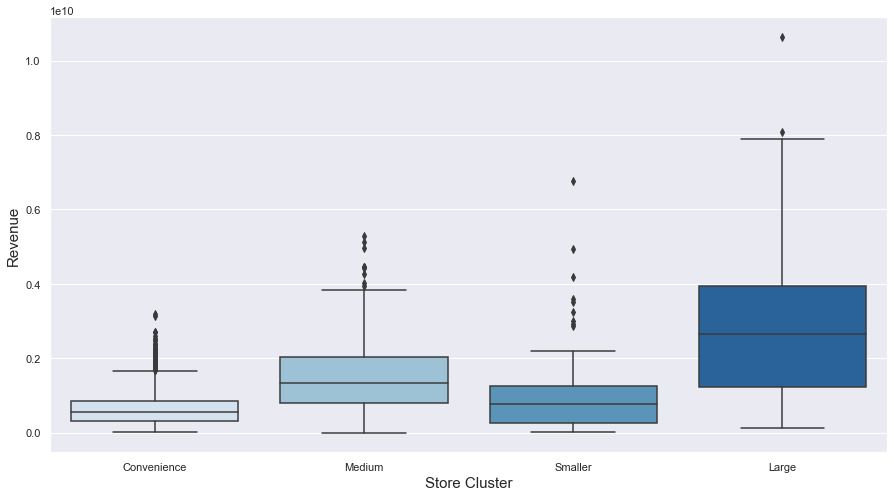

In [178]:
feature = 'store_revenue'


sns.set(rc = {'figure.figsize':(15,8)})
box = sns.boxplot(x='Store_Cluster', y=feature, data=stores_clust_info_combined4,palette='Blues')

box.set_xlabel('Store Cluster',fontsize=15)
box.set_ylabel('Revenue',fontsize=15)
                 

# box.set_title(feature,fontsize=20)



In [ ]:
# where do I put my store to make the most money
# don't worry about inventory

Text(0, 0.5, 'Number of Unique Products')

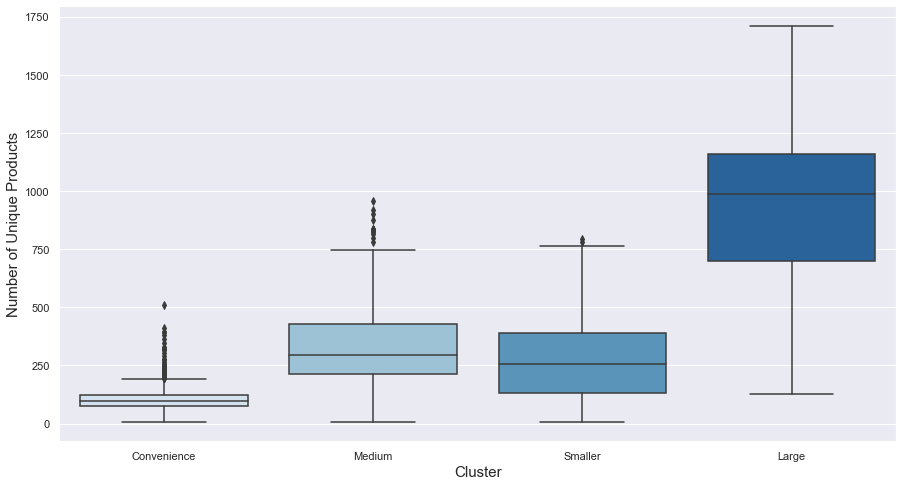

In [172]:
feature = 'tot_num_unique_items'


sns.set(rc = {'figure.figsize':(15,8)})
box = sns.boxplot(x='Store_Cluster', y=feature, data=stores_clust_info_combined4,palette='Blues')

box.set_xlabel('Store Cluster',fontsize=15)
box.set_ylabel('Number of Unique Products',fontsize=15)
                 

# box.set_title(feature,fontsize=20)


In [179]:
feature = 'tot_num_unique_items'

def box(feature,ylabel):

    sns.set(rc = {'figure.figsize':(15,8)})
    box = sns.boxplot(x='Store_Cluster', y=feature, data=stores_clust_info_combined4,palette='Blues')

    box.set_xlabel('Store Cluster',fontsize=15)
    box.set_ylabel(ylabel,fontsize=15)
                 


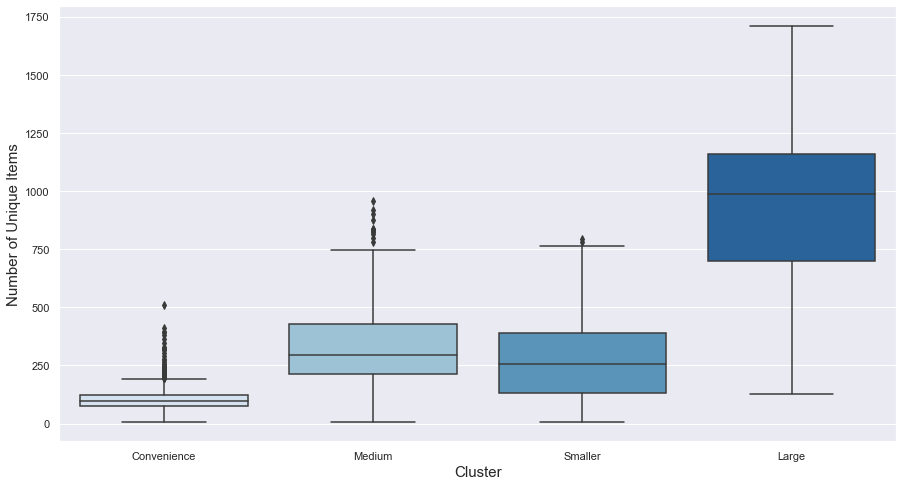

In [174]:
box('tot_num_unique_items','Number of Unique Items')

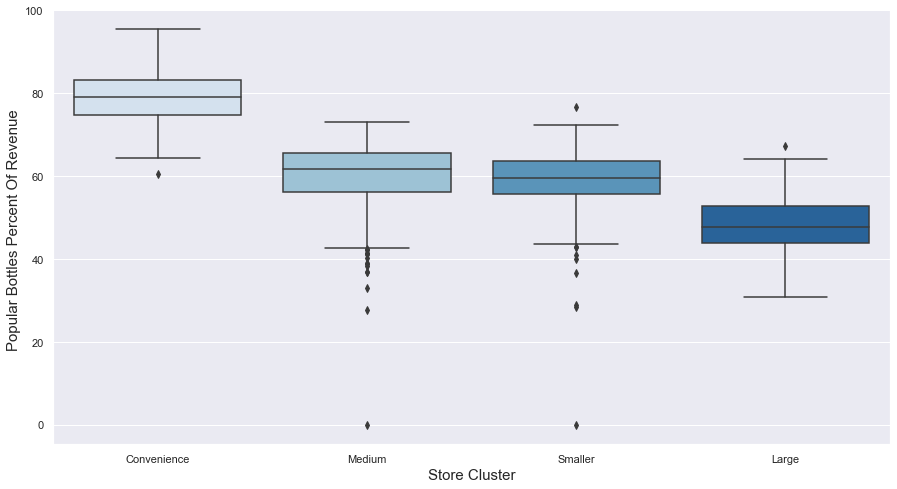

In [180]:
box('rev_Popular_Bottles','Popular Bottles Percent Of Revenue ')

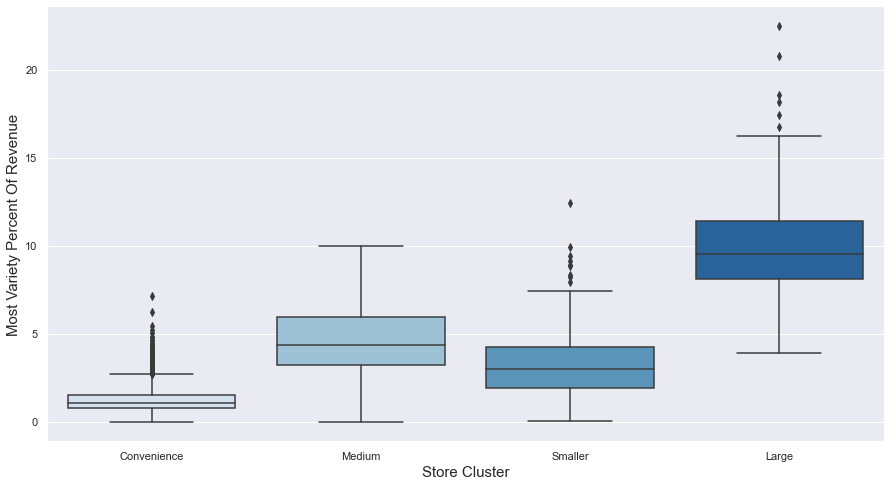

In [182]:
box('rev_Most_Variety','Most Variety Percent Of Revenue')

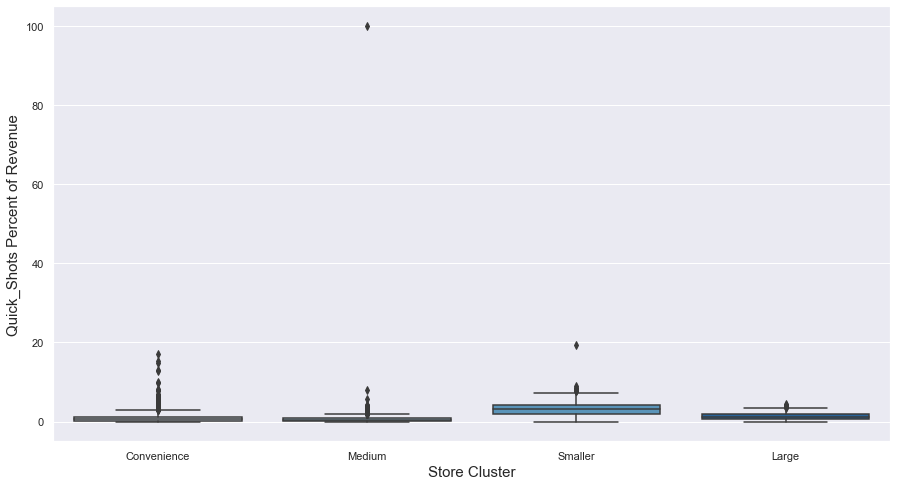

In [183]:
box('rev_Quick_Shots','Quick_Shots Percent of Revenue')

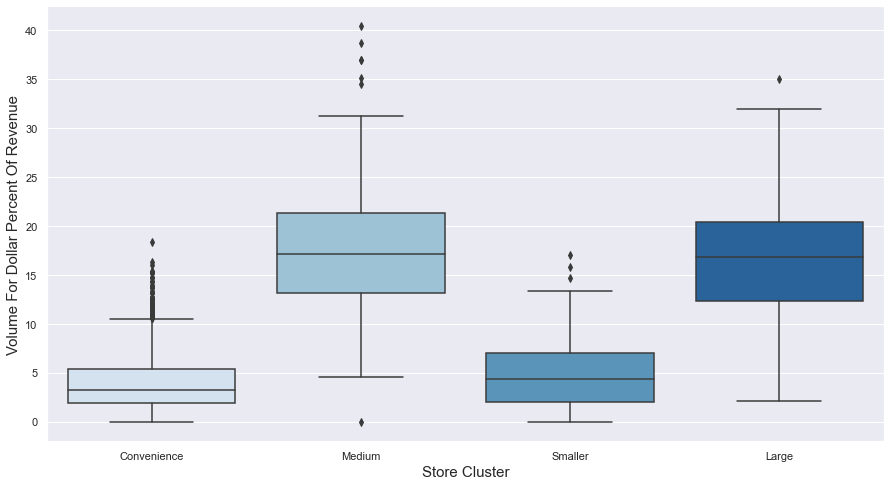

In [184]:
box('rev_Volume_For_Dollar','Volume For Dollar Percent Of Revenue')

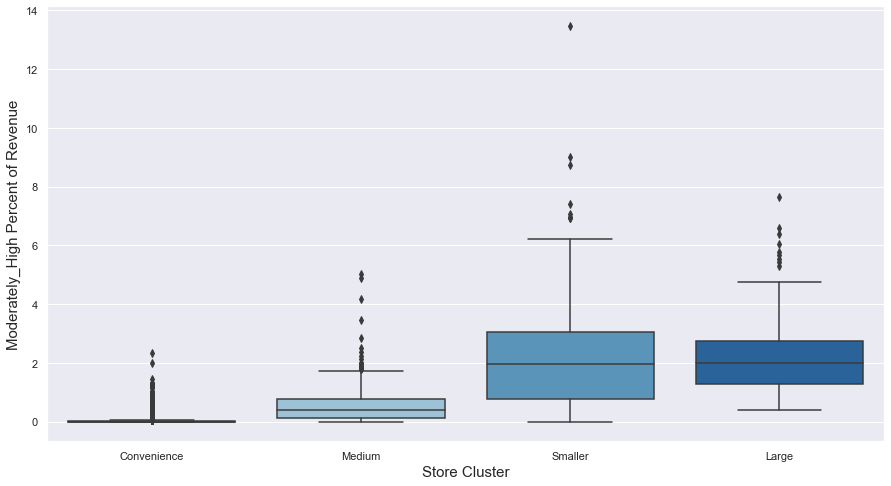

In [185]:
box('rev_Moderately_High','Moderately High Percent of Revenue')

In [ ]:
# stores_clust_info_combined4.columns

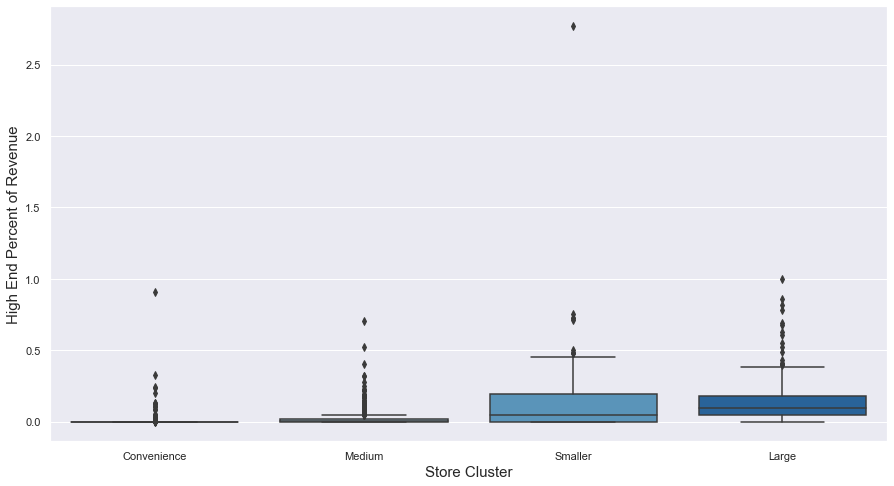

In [186]:
box('rev_High_End','High End Percent of Revenue')

In [ ]:
# where do I put my store to make the most money
# don't worry about inventory